# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Целью работы является исследовательский анализ основных параметров квартир и определения зависимости итоговой цены от некоторых из них. Для этого нужно прочитать и предобработать данные, при необходимости добавить новые параметры, опираясь на сущещствующие, провести исследовательский анализ и сделать выводы.

Исходными данными является csv-файл со следующими параметрами:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

#### Загрузка данных из файла в датафрейм.

Для начала подключим все необходимые библиотеки, а именно pandas для работы с данными и модуль pyplot библиотеки matplotlib для построения графиков.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитаем файл, находящийся в /datasets/real_estate_data.csv, запишем данные в переменную data и посмотрим общую информацию

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23699 entries, 0 to 23698

Data columns (total 1 columns):

 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 

---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 

 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_a

Видим, что в переменной data всего 1 столбец. Значит в файле real_estate_data.csv все строки склеены. Выведем первые 5 строки (чтобы наверняка) и определим разделитель.

In [3]:
print(data.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition

0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  

1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  

2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...            

Видим, что разделителем служит \t. Прочитаем файл заново, учитывая разделитель, чтобы получился полноценный датафрейм, и выведем первые пять строк, чтобы убедиться, что данные разделились на столбцы.

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Видим столбцы, теперь посмотрим на общую информацию.

#### Изучение общей информации о датафрейме.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23699 entries, 0 to 23698

Data columns (total 22 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   total_images          23699 non-null  int64  

 1   last_price            23699 non-null  float64

 2   total_area            23699 non-null  float64

 3   first_day_exposition  23699 non-null  object 

 4   rooms                 23699 non-null  int64  

 5   ceiling_height        14504 non-null  float64

 6   floors_total          23613 non-null  float64

 7   living_area           21796 non-null  float64

 8   floor                 23699 non-null  int64  

 9   is_apartment          2775 non-null   object 

 10  studio                23699 non-null  bool   

 11  open_plan             23699 non-null  bool   

 12  kitchen_area          21421 non-null  float64

 13  balcony               12180 non-null  float64

 14  locality_name         23650 non-null  object 

 15 

Итак, получили датафрейм, в котором 23699 строк и 22 столбца. Видим, что во многих столбцах имеются пустые значения. Также видим, что типы данных не во всех столбцах удобны для анализа. Например столбец is_apartment, хранящий информацию, является ли объект аппартаментами, имеет тип данных object, но удобнее будет тип данных bool. Будем разбираться.

Построим общую гистограмму для всех столбцов таблицы

#### Построение общей гистограммы для всех столбцов.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

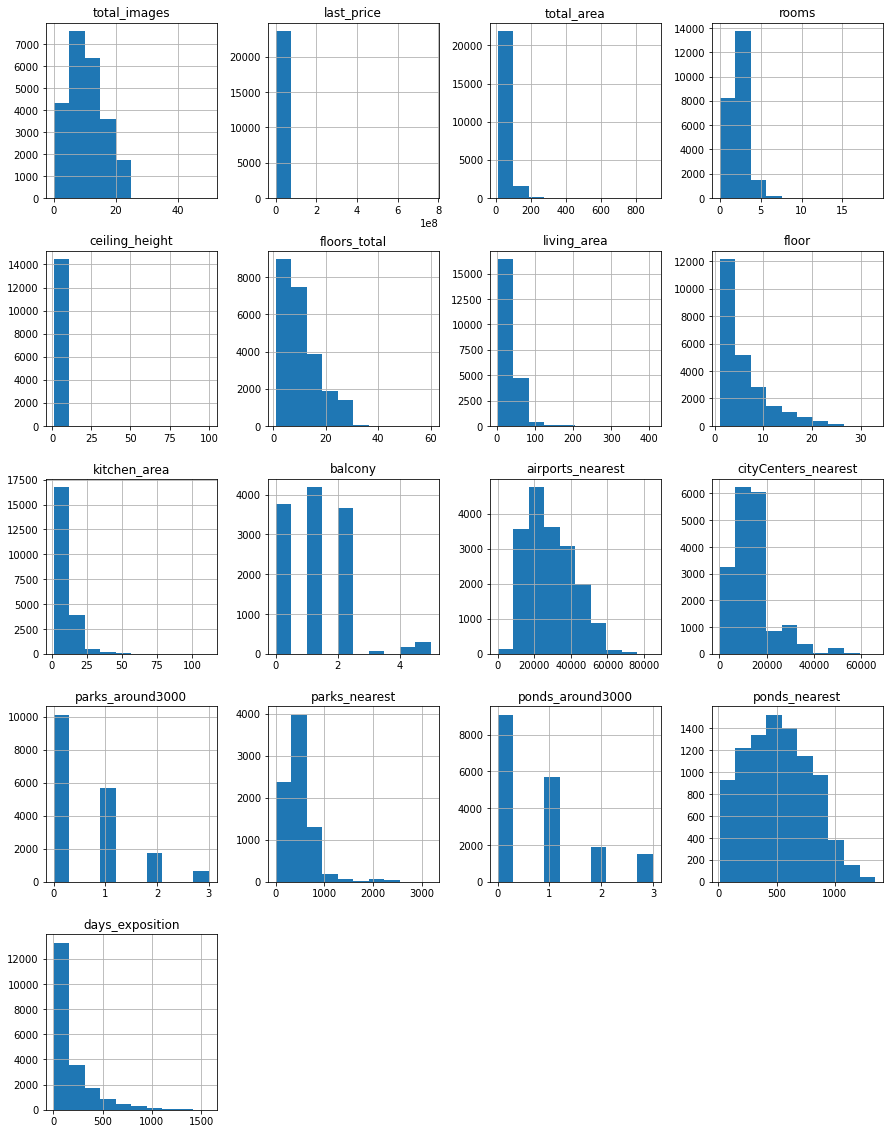

In [6]:
data.hist(figsize=(15, 20))

Имеем начальное представление по исходным данным, далее необходимо их предобработать.

### Предобработка данных

#### Нахождение и изучение пропущенных значений в столбцах

Основные задачи:
- определить, в каких столбцах есть пропуски,
- заполнить пропущенные значения там, где это возможно.Если логичную замену предложить невозможно, то оставить эти значения пустыми,
- указать причины, которые могли привести к пропускам в данных.


Из общей информации видим, что столбцов с пропусками - 14 штук. Разберем их все по очереди.

ceiling_height - высота потолков в метрах. Логически пропущенные значения достоверно не определить, поэтому в случае необходимости можно заменить их медианным, так как медианное значение менее чувствительно к выбросам и аномальным значениям.

floors_total - количество этажей в доме. Логически пропущенные значения достоверно также не определить, но пропускам в данном столбце при необхдимости можно присвоить значения столбца floor, так как в доме не может быть количество этажей меньше, чем этаж, на котором располагается объект.

living_area - жилая площадь в квадратных метрах. Логически достоверно не определить. При необходимости, пропуски можно заменить на медианное значение для квартир с соответствующим значением rooms - число комнат.

is_apartment - является ли квартира аппартаментами. Логически достоверно не определить. Предположительно, если значение пропущено, то скорее всего квартира не является аппаратментами.

kitchen_area - площадь кухни в квадратных метрах. Логически достоверно не определить. При необходимости, пропуски можно заменить на медианное значение.

balcony - число балконов. Предположительно, если значение пропущено, то скорее всего у квартиры балконы отсутствуют. Можно заменить отсутствующие зачения на 0.

locality_name - название населённого пункта. Логически пропущенные значения достоверно не определить, а учитывая, что 23650 из 23699 значений не пустые, то строки с пропущенными значениями можно удалить. Однако, согласно заданию, такие пропуски нужно оставлять.

airports_nearest - расстояние до ближайшего аэропорта в метрах. Пропуски можно попробовать заменить на медианные значения для соответствующих населенных пунктов. Может быть такое, что у всех квартир определенного населеного пункта будет пустым. В таком случае оставляем пропущенные значение без изменений. 

cityCenters_nearest - расстояние до центра города. Количество заполненных строк 18180 из 23699. Данную величину логически достоверно не определить, а строки с пропущенными значениями не удалить, так как их доля составляет существенную часть данных (23%).

parks_around3000 - число парков в радиусе 3 км. Предположительно, если значение пропущено, то скорее всего в радиусе 3 км парки  отсутствуют. Можно заменить отсутствующие зачения на 0. Однако, если для данных строк имеется ненулевое зачение в столбце parks_nearest и оно не более 3 км, то пропущенные parks_around3000 заменим на 1.

parks_nearest - расстояние до ближайшего парка в метрах. Логически пропущенные значения достоверно не определить, однако, если есть хотя бы один парк в столбце parks_around3000, то в случае необходимости, пропущенное значение можно заменить на 3000.

ponds_around3000 - число водоёмов в радиусе 3 км, ponds_nearest - расстояние до ближайшего водоёма в метрах. Аналогично parks_around3000 и parks_nearest, соответственно.

days_exposition - сколько дней было размещено объявление (от публикации до снятия). Предположительно, если значение пропущено, то объявление еще не снято. Пропуски нужно сохранить без изменений.

**Исходя из задания и по совету опытного специалиста, пропущенные данные, которые логически достоверно не определить, нужно оставить без изменений и заполнить только те, которые можем определить отосительно достоверно. Это пропуски в столбцах: balcony, parks_around3000 и ponds_around3000.**

Заполним пропуски в указанных столбцах.

Выведем количество пропущенных значений и уникальные значения в исходных данных указанных столбцов.
Будем использовать вывод до и после замены как проверку, что пустые значения заполнены.

In [7]:
print('Пропуски в столбце balcony:', data['balcony'].isna().sum())
print('Уникальные значения в столбце balcony:', data['balcony'].unique())

print('Пропуски в столбце parks_around3000:', data['parks_around3000'].isna().sum())
print('Уникальные значения в столбце parks_around3000:', data['parks_around3000'].unique())

print('Пропуски в столбце ponds_around3000:', data['ponds_around3000'].isna().sum())
print('Уникальные значения в столбце ponds_around3000:', data['ponds_around3000'].unique())

Пропуски в столбце balcony: 11519

Уникальные значения в столбце balcony: [nan  2.  0.  1.  5.  4.  3.]

Пропуски в столбце parks_around3000: 5518

Уникальные значения в столбце parks_around3000: [ 1.  0.  2. nan  3.]

Пропуски в столбце ponds_around3000: 5518

Уникальные значения в столбце ponds_around3000: [ 2.  0.  3.  1. nan]


Произведем замену в столбце balcony и сразу проверим результат.

In [8]:
data['balcony'] = data['balcony'].where(~data['balcony'].isna(), 0)

print('Пропуски в столбце balcony:', data['balcony'].isna().sum())
print('Уникальные значения в столбце balcony:', data['balcony'].unique())

Пропуски в столбце balcony: 0

Уникальные значения в столбце balcony: [0. 2. 1. 5. 4. 3.]


Произведем замену пустых значений в столбце parks_around3000 там, где значение parks_nearest существует и не более 3000 метров, затем проверим результат.

Для начала определим есть ли вообще такие строки, где parks_around3000 было бы пропущео и при этом parks_nearest было бы не пустым и менее 3000. Для этого посмотрим уникальные значения столбца parks_nearest, где parks_around3000 пропущено.

In [9]:
print(data[data['parks_around3000'].isna()]['parks_nearest'].unique())

[nan]


**Получается, что во всех строках, где пропущено parks_around3000, так же пропущено и parks_nearest, что не оставляет возможности заполнить хоть какие-то пропуски в столбце parks_around3000.**

Проверим то же самое для столбца ponds_around3000.

In [10]:
print(data[data['ponds_around3000'].isna()]['ponds_nearest'].unique())

[nan]


**Аналогичная ситуация и для столбца ponds_around3000.**

**Промежуточный итог:**  
- определили пропуски в данных и столбцы, в которых пропуски могут быть логически определены;
- произвели замену пропусков там, где это возможно. 

Возможные причины пропусков данных:
- сокрытие информации,
- ограничение прав доступа,
- ошибки при записи, сохранении, хранении и чтении данных.

In [11]:
print('Значения в столбце is_apartment\n', data['is_apartment'].value_counts())
print('Пропуски в столбце is_apartment\n', data['is_apartment'].isna().sum())

Значения в столбце is_apartment

 False    2725

True       50

Name: is_apartment, dtype: int64

Пропуски в столбце is_apartment

 20924


#### Исследование типов данных

Основные задачи:
- найти столбцы, в которых нужно изменить тип данных,
- преобразовать тип данных в выбранных столбцах,
- пояснить, почему нужно изменить тип данных.

Разберем каждый столбец и его тип данных:
- total_images, тип данных int64 - подходит, так как используются натуральные числа;
- last_price, тип данных float64 - подходит, несмотря на то, что по первым пяти строкам видно, что копейки никто не считает;
- total_area, тип данных float64 - подходит, так как площадь записывают вещественными числами;
- first_day_exposition, тип данных object - **не подходит, необходимо преобразовать в datetime для удобной работы с данными;**
- rooms, тип данных int64 - подходит, так как используются натуральные числа;
- ceiling_height, тип данных float64 - подходит, так как высота потолков в метрах записывают вещественными числами;
- floors_total, тип данных float64 - использовать можно, но можно перевести в int64, так как количество этажей - натуральное число;
- living_area, тип данных float64 - подходит, так как площадь записывают вещественными числами;
- floor, тип данных int64 - подходит, так как для обозначения этажа используются натуральные числа;
- is_apartment, тип данных object - **не подходит, лучше перевести в bool, так будет проще находить доли, если потребуется;**
- studio, тип данных bool - подходит, такак как информация о студии - да или нет;
- open_plan, тип данных bool - подходит, такак как информация о свободной планировке - да или нет;
- kitchen_area, тип данных float64 - подходит, так как площадь записывают вещественными числами;
- balcony, тип данных float64 - использовать можно, но можно перевести в int64, так как количество балконов - натуральное число;
- locality_name, тип данных object - подходит, название населённого пункта - это текст;
- airports_nearest, тип данных float64 - подходит, расстояние до ближайшего аэропорта в метрах может быть вещественным числом;
- cityCenters_nearest, тип данных float64 - подходит, расстояние до расстояние до центра города в метрах может быть вещественным числом;
- parks_around3000, тип данных float64 - использовать можно, но можно перевести в int64, так как количество парков - натуральное число;
- parks_nearest, тип данных float64 - подходит, расстояние до расстояние до ближайшего парка в метрах может быть вещественным числом;
- ponds_around3000, тип данных float64 - использовать можно, но можно перевести в int64, так как количество водоёмов - натуральное число;
- ponds_nearest, тип данных float64 - подходит, расстояние до расстояние до ближайшего водоёма в метрах может быть вещественным числом;
- days_exposition, тип данных float64 - использовать можно, но можно перевести в int64, так как количество дней - натуральное число.

Изменим тип данных в столбцах first_day_exposition и is_apartment, и выведем основную информацию о таблице, чтобы проверить.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('boolean')
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23699 entries, 0 to 23698

Data columns (total 22 columns):

 #   Column                Non-Null Count  Dtype         

---  ------                --------------  -----         

 0   total_images          23699 non-null  int64         

 1   last_price            23699 non-null  float64       

 2   total_area            23699 non-null  float64       

 3   first_day_exposition  23699 non-null  datetime64[ns]

 4   rooms                 23699 non-null  int64         

 5   ceiling_height        14504 non-null  float64       

 6   floors_total          23613 non-null  float64       

 7   living_area           21796 non-null  float64       

 8   floor                 23699 non-null  int64         

 9   is_apartment          2775 non-null   boolean       

 10  studio                23699 non-null  bool          

 11  open_plan             23699 non-null  bool          

 12  kitchen_area          21421 non-null  float64       

 13

**Промежуточный итог:**
- проанализированы типы данных в столбцах, выбраны столбцы, в которых необходимо изменить тип данных;
- изменены типы данных в выбранных столбцах для последующего удобства работы с ними.

#### Изучение уникальных значения в столбце с названиями и устранение неявных дубликатов. 

Изучим уникальные значения столбца locality_name:

In [13]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'

 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'

 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'

 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'

 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'

 'деревня Новое Девяткино' 'посёлок Металлострой'

 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'

 'поселок Молодцово' 'поселок городского типа Кузьмоловский'

 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'

 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'

 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'

 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'

 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'

 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'

 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'

 'Зеленогорск' 'Сосновый Бор' 'по

Одними из самых распростаренных неявных дубликатов названий населенных пунктов являются строки со словами поселок, посёлок, поселок городского типа, поселок станции, поселок при железнодорожной станции, городской поселок. Заменим данные слова на слово поселок, таким образом уменьшим количество уникальных значений для обработки.
Выведем количество уникальных значений столбца locality_name, затем произведем замену сначала слова посёлок, затем остальных, чтобы работать только с буквой е, после чего выведем количество уникальных значений снова для проверки, насколько уменьшилось их количество.

In [14]:
print('Количество уникальных значений было:', data['locality_name'].nunique())

data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
wrong_locality_name=['поселок городского типа',
                     'поселок станции',
                     'поселок при железнодорожной станции',
                     'городской поселок']
data['locality_name'] = data['locality_name'].replace(wrong_locality_name, 'поселок', regex=True)
#data['locality_name'] = data['locality_name'].replace('поселок городского типа', 'поселок', regex=True)
print('Количество уникальных значений стало:', data['locality_name'].nunique())

Количество уникальных значений было: 364

Количество уникальных значений стало: 319


Устранили 45 неявных дубликата.

Выведем уникалльные значения снова и поищем оставшиеся неявные дубликаты.

In [15]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'

 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'

 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'

 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'

 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'

 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'

 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'

 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'

 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'

 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'

 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'

 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'

 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'

 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'

 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'

 'Л

Более неявных дубликатов не находится. Имеются такие значения, как например 'деревня Кудрово' и 'Кудрово'. Данные значения могут означать разные населенные пункты, что проверить крайне непросто. Поэтому подобные значения не будем принимать за неявные дубликаты.

**Промежуточный итог:** изучены и устранены неявные дубликаты в столбце с названиями населенных пунктов locality_name.

Проверим количество явных дубликатов.

In [16]:
print('Количество явных дупликатов:', data.duplicated().sum())

Количество явных дупликатов: 0


Видим, что явные дубликаты в таблице отсутствуют.

#### Нахождение и устранение аномальных значений и выбросов.

Рассмотрим каждый столбец отдельно, учитывая их тип данных.

##### total_images - количество фотографий в объявлении.

array([[<AxesSubplot:title={'center':'total_images'}>]], dtype=object)

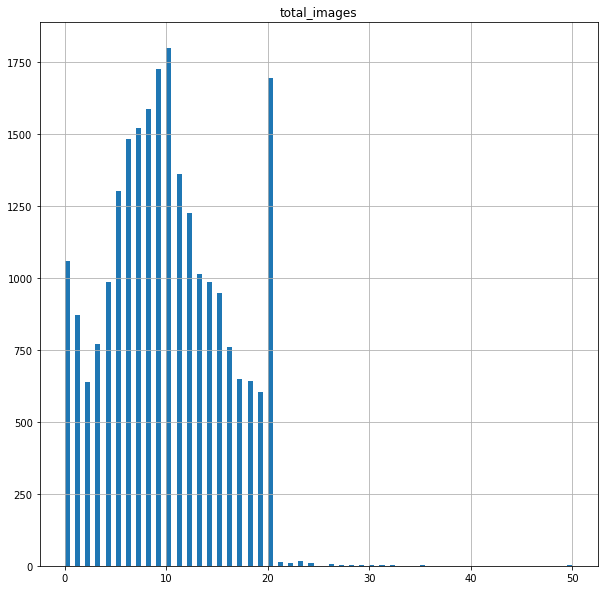

In [17]:
data.hist('total_images', bins=100, figsize=(10, 10))

Имеется незначительная доля объявлений, где разметили более 20 фотографий. Отбросим их. Скорее всего в объявление можно было добавлять максимум 20 фотографий, а те, что больше - ошибки в данных. Возможно счетчик количества фотографий продолжал считать, когда производили замену фотографий в объявлении. Примем, что максимальнео количество фотографий - 20 штук и заменим значения больше 20 на 20. Выведем гистограмму снова.

array([[<AxesSubplot:title={'center':'total_images'}>]], dtype=object)

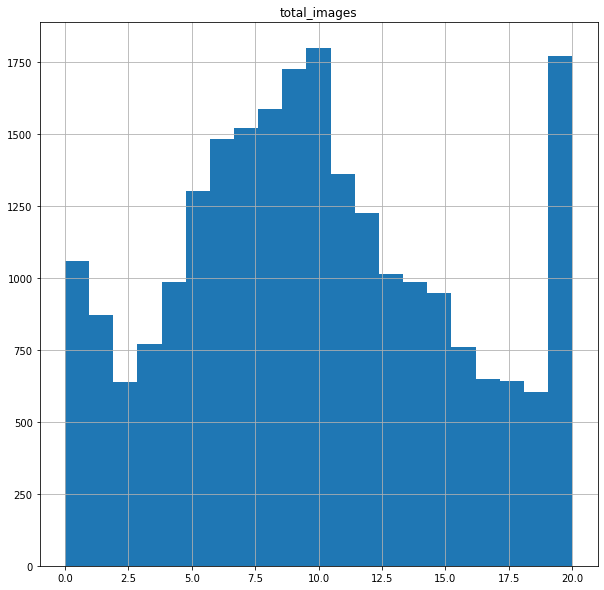

In [18]:
data['total_images'] = data['total_images'].where(data['total_images']<=20, 20)
data.hist('total_images', bins=21, figsize=(10, 10))

##### last_price - цена на момент снятия с публикации.

In [19]:
print(data.sort_values(by='last_price')['last_price'])

8793         12190.0

17456       430000.0

14911       430000.0

16274       440000.0

17676       450000.0

            ...     

15651    300000000.0

1436     330000000.0

14706    401300000.0

19540    420000000.0

12971    763000000.0

Name: last_price, Length: 23699, dtype: float64


Видим минималную цену 12190 рублей, что не очень похоже на цену квартиры. Скорее всего данное значение указали в тысячах. Исправим это, умножив его на 1000. Остальные цены можно считать нормальными. Построим гистограмму.

17456       430000.0

14911       430000.0

16274       440000.0

17676       450000.0

9581        450000.0

            ...     

15651    300000000.0

1436     330000000.0

14706    401300000.0

19540    420000000.0

12971    763000000.0

Name: last_price, Length: 23699, dtype: float64


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

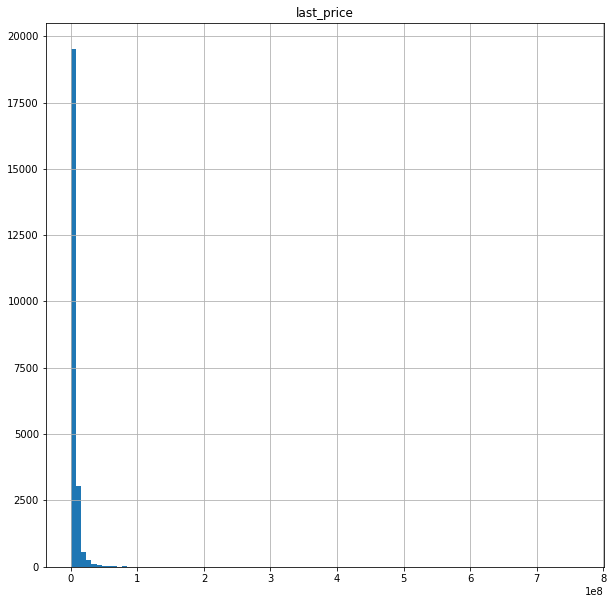

In [20]:
data['last_price'] = data['last_price'].where(data['last_price']!=12190, 12190*1000)
print(data.sort_values(by='last_price')['last_price'])

data.hist('last_price', bins=100, figsize=(10, 10))

Рассмотрим подробнее участок от 0 до 50 млн.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

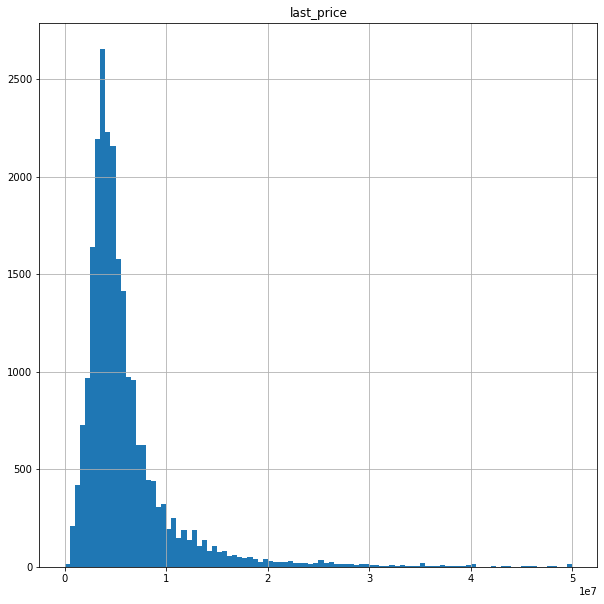

In [21]:
data.hist('last_price', bins=100, range=(0, 50*10**6), figsize=(10, 10))

Ограничимся ценником в 20 млн, так как с большим ценником квартиры встречались редко.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

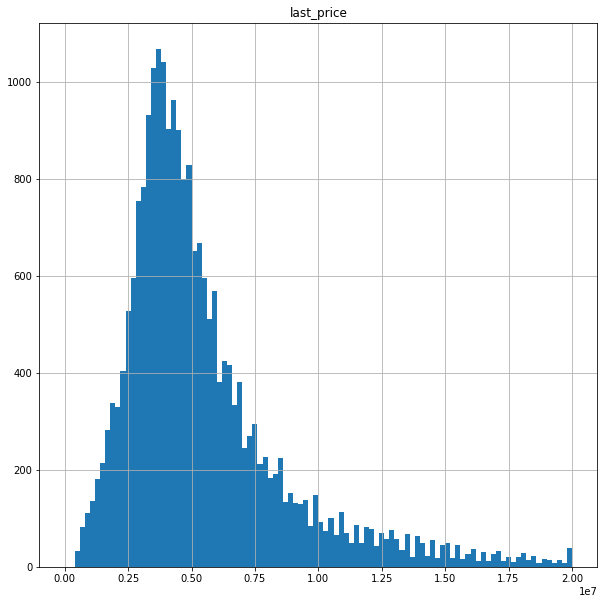

In [22]:
data = data[data['last_price']<=20*10**6]
data.hist('last_price', bins=100, range=(0, 20*10**6), figsize=(10, 10))

##### total_area - общая площадь квартиры в квадратных метрах.

In [23]:
print(data.sort_values(by='total_area')['total_area'])
print(sorted(data['total_area'].unique()))

19904     12.0

19546     13.0

17961     13.0

19807     13.0

19558     13.2

         ...  

9397     263.8

22238    287.5

13397    309.7

11087    320.0

20273    460.8

Name: total_area, Length: 22992, dtype: float64

[12.0, 13.0, 13.2, 14.0, 15.0, 15.5, 16.0, 17.0, 17.2, 17.6, 17.78, 18.0, 18.4, 18.5, 18.8, 18.9, 19.0, 19.5, 20.0, 20.1, 20.3, 20.5, 20.6, 20.67, 20.8, 21.0, 21.1, 21.3, 21.4, 21.57, 21.6, 21.7, 21.8, 21.89, 21.9, 22.0, 22.2, 22.23, 22.3, 22.4, 22.5, 22.7, 23.0, 23.06, 23.17, 23.29, 23.3, 23.39, 23.4, 23.5, 23.55, 23.6, 23.69, 23.7, 23.8, 23.98, 24.0, 24.05, 24.1, 24.2, 24.26, 24.3, 24.4, 24.42, 24.5, 24.6, 24.62, 24.64, 24.67, 24.7, 24.75, 24.8, 24.9, 25.0, 25.07, 25.15, 25.2, 25.27, 25.3, 25.33, 25.36, 25.4, 25.41, 25.48, 25.5, 25.53, 25.55, 25.6, 25.63, 25.7, 25.8, 25.9, 26.0, 26.05, 26.09, 26.1, 26.18, 26.2, 26.23, 26.4, 26.45, 26.49, 26.5, 26.6, 26.69, 26.7, 26.8, 26.9, 27.0, 27.1, 27.11, 27.2, 27.3, 27.32, 27.36, 27.4, 27.5, 27.55, 27.56, 27.6, 27.7, 27.8, 2

В принципе, аномальных значений не наблюдается, так как имеются квартиры (в основном студии) с площадью 12 кв.м и квартиры с площадью 900 кв.м и более. Построим гистограмму.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

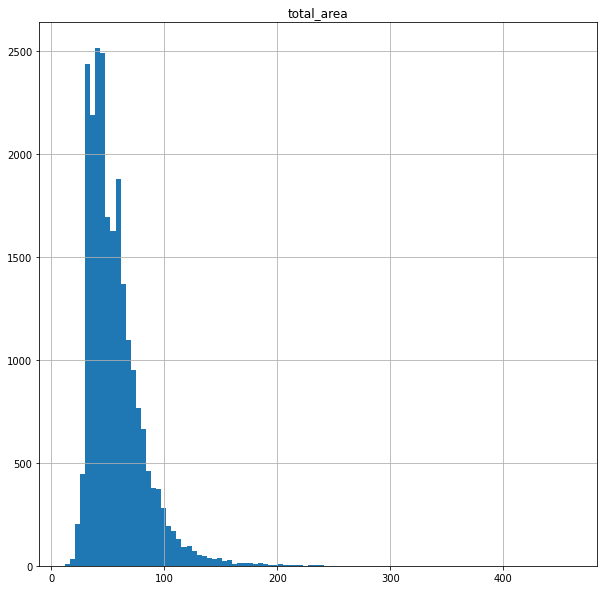

In [24]:
data.hist('total_area', bins=100, figsize=(10, 10))

Рассмотрим подробнее участок от 0 до 300.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

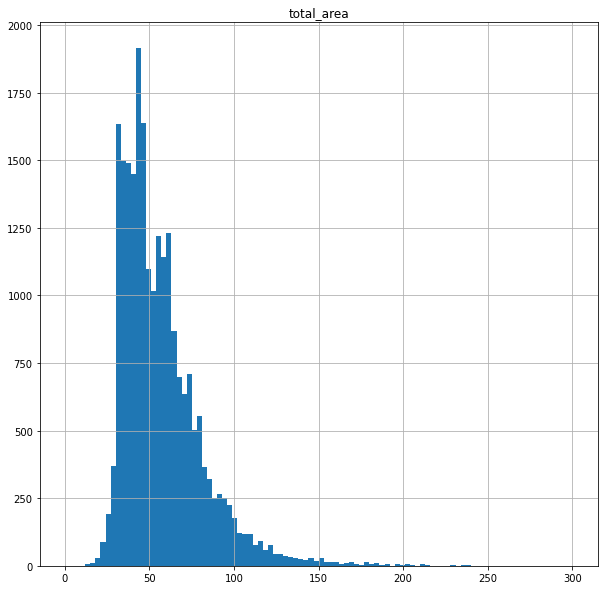

In [25]:
data.hist('total_area', bins=100, range=(0, 300), figsize=(10, 10))

Ограничимся диапазоном от 20 до 200 квадратных метров. Остальные значения встречаются редко.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

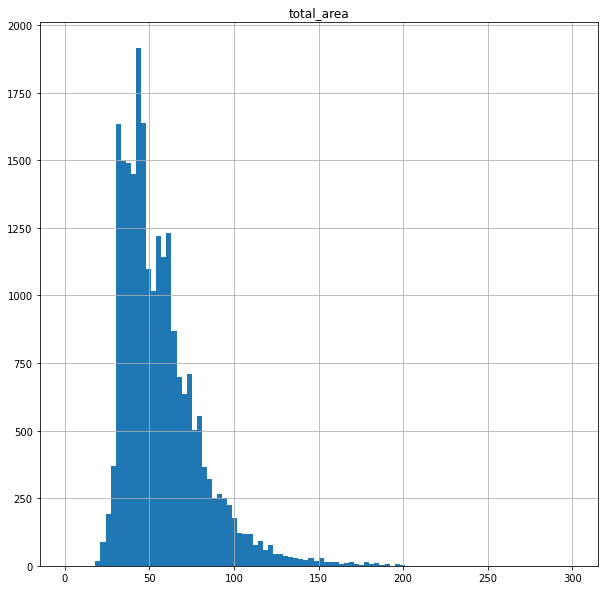

In [26]:
#data= data.where((data['total_area']<=150)&(25<=data['total_area']))
data= data[((data['total_area']<=200)&(20<=data['total_area']))|(data['total_area'].isna())]
data.hist('total_area', bins=100, range=(0, 300), figsize=(10, 10))

##### first_day_exposition - дата публикации

3955    2014-11-27

696     2014-11-27

617     2014-11-27

13246   2014-11-27

10364   2014-11-27

           ...    

3254    2019-05-03

12343   2019-05-03

17872   2019-05-03

5986    2019-05-03

14424   2019-05-03

Name: first_day_exposition, Length: 22923, dtype: datetime64[ns]


array([[<AxesSubplot:title={'center':'first_day_exposition'}>]],
      dtype=object)

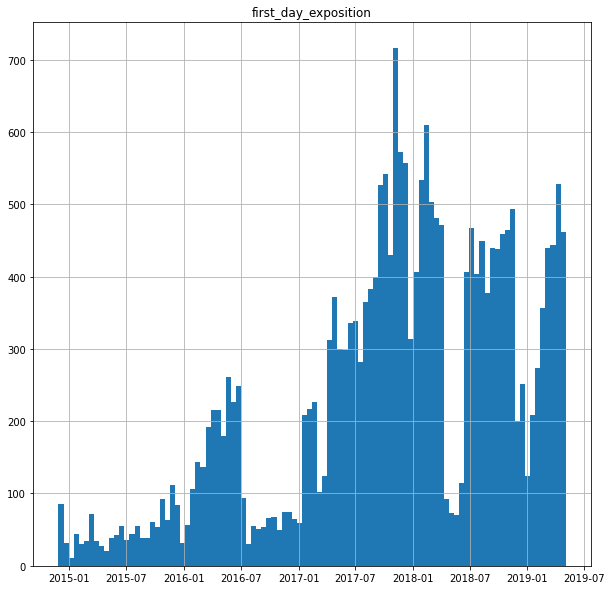

In [27]:
print(data.sort_values(by='first_day_exposition')['first_day_exposition'])
data.hist('first_day_exposition', bins=100, figsize=(10, 10))

Даты как даты, ничего особенного. На гистограмме наблюдаются периоды активности и затишья на рынке недвижимости квартир.

##### rooms - число комнат

In [28]:
print(data['rooms'].value_counts())

1     8017

2     7865

3     5569

4      999

5      218

0      188

6       52

7       13

8        1

11       1

Name: rooms, dtype: int64


Наблюдаем 197 квартир с количеством комнат 0, что составляет 0,8% от общего количества объявлений. Логически определить количество комнат не получится, поэтому исключим строки с нулевым количеством комнат.

Также, опираясь на беглый поиск квартир на Циане, не удалось найти квартиры с числом комнат больше 6. Благо, их доля в данных несущесвенна, поэтому исключим их.


Затем выведем информацию заново.

In [29]:
data = data[(data['rooms']!=0)&(data['rooms']<=6)]
print(data['rooms'].value_counts())

1    8017

2    7865

3    5569

4     999

5     218

6      52

Name: rooms, dtype: int64


##### ceiling_height - высота потолков в метрах

Выведем уникальные значения и посмотрим на гистограмму

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.66, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.7, 3.75, 3.78, 3.8, 3.83, 3.84, 3.85, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.5, 4.7, 4.8, 5.0, 5.3, 8.0, 8.3, 10.3, 14.0, 20.0, 22.6, 24.0, 25.0, 26.0, 27.0, 27.5, 32.0, 100.0]


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

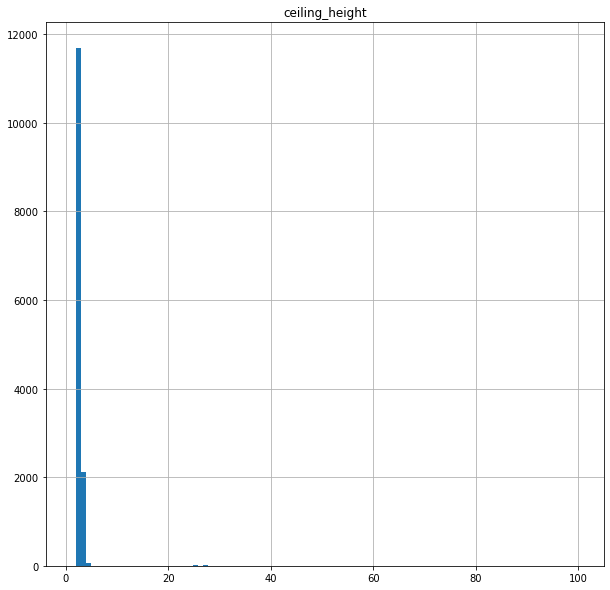

In [30]:
print(sorted(data['ceiling_height'].unique()))
data.hist('ceiling_height', bins=100, figsize=(10, 10))

Видим очень малое количество квартир с высотой потолков больше примерно 5 метров. Ограничим диапазон, чтобы лучше рассмотреть участок, где заканчивается пик.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

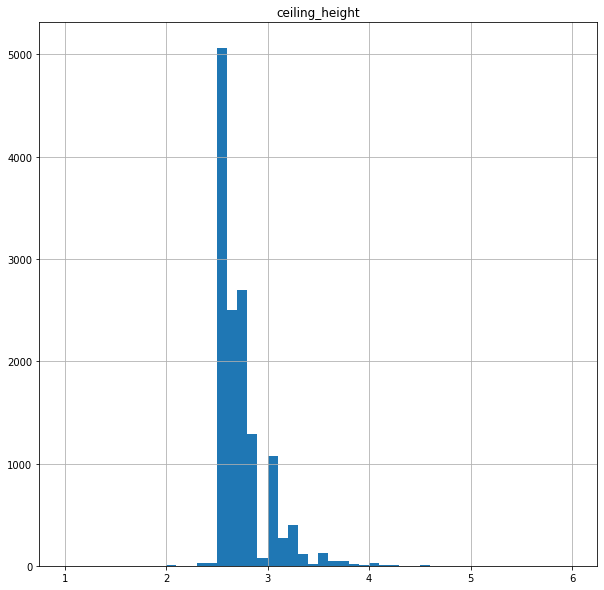

In [31]:
data.hist('ceiling_height', bins=50, range=(1, 6), figsize=(10, 10))

Согласно СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные» высота потолков должна быть не ниже 2.50 метров. Максимальная высота не регламентируется, но на гистограмме видим, что количество квартир с высотой потолков более 3,50 метров очень мало, поэтому оставим только те строки, где ceiling_height от 2.50 до 3.50.  
Однако, в уникальных значениях видим числа, которые очень не похожи на высоту потолков в метрах, но может быть такое, что значения просто были записаны без запятой, то есть 25 соответствует 2,5 метрам. Так как выбираемый диапазон от 2.50 до 3.50, найдем значения от 25 и больше и поделим их на 10.  
После этого оставим только те строки, где ceiling_height от 2.50 до 3.50.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

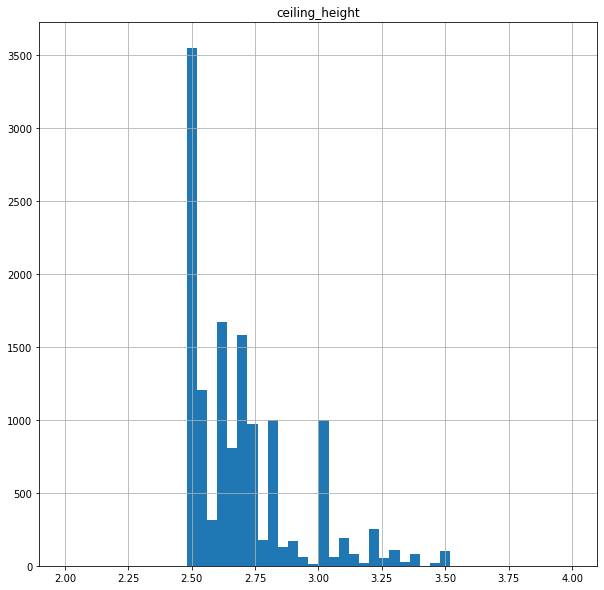

In [32]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<25, data['ceiling_height']/10)
data = data[((2.5<=data['ceiling_height'])&(data['ceiling_height']<=3.5))|(data['ceiling_height'].isna())]
data.hist('ceiling_height', bins=50, range=(2, 4), figsize=(10, 10))

##### floors_total - всего этажей в доме

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, nan, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0, 52.0, 60.0]


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

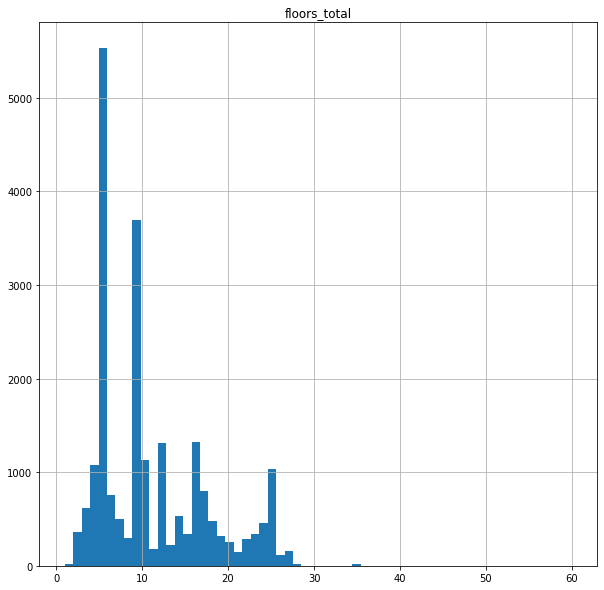

In [33]:
print(sorted(data['floors_total'].unique()))
data.hist('floors_total', bins=60, figsize=(10, 10))

Рассмотрим поближе значения от 0 до 40, так как количество этажей в доме больше 30 встречаются редко, что видно из гистограммы.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

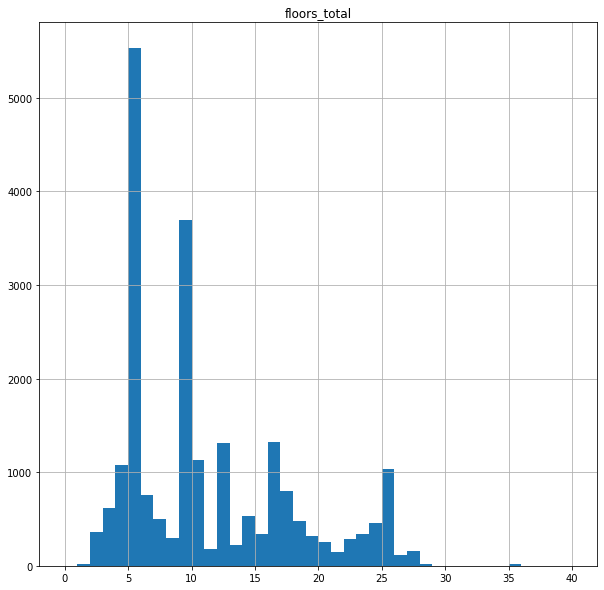

In [34]:
data.hist('floors_total', bins=40, range=(0, 40), figsize=(10, 10))

Видим, что дома с одним тажом и количеством этажей более 27, встречаются очень редко. Оставим только те значения, которые находятся в диапазоне от 2 до 27 включительно.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

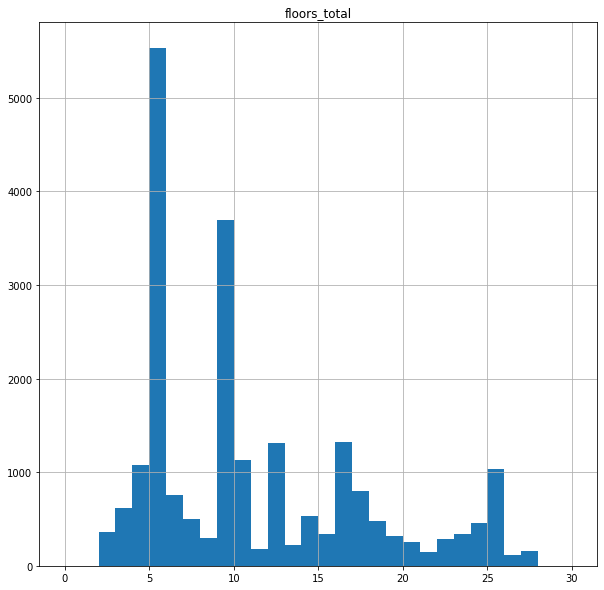

In [35]:
data = data[((2<=data['floors_total'])&(data['floors_total']<=27))|(data['floors_total'].isna())]
data.hist('floors_total', bins=30, range=(0, 30), figsize=(10, 10))

##### living_area - жилая площадь в квадратных метрах

In [36]:
print(data['living_area'].value_counts())
print(sorted(data['living_area'].unique()))

18.00    851

17.00    659

30.00    590

16.00    473

20.00    466

        ... 

33.47      1

3.00       1

20.97      1

17.45      1

16.74      1

Name: living_area, Length: 1530, dtype: int64

[2.0, 3.0, 8.3, 10.0, 10.6, 12.0, 13.0, 14.0, 14.4, 14.47, 14.7, 14.73, 15.0, 15.1, 15.2, 15.35, 15.36, 15.4, 15.43, 15.6, 15.9, 16.0, 16.1, 16.3, 16.5, 16.7, 16.9, 17.0, 17.2, 17.4, 17.5, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.4, 18.5, 18.6, 18.9, 19.0, 19.2, 19.3, 19.4, 19.5, 20.0, 20.3, 20.5, 20.75, 20.8, 21.0, 23.0, 25.0, 25.4, 25.41, 25.6, 26.0, 26.1, 26.4, 26.7, 27.0, 27.4, 27.46, 27.5, 27.7, 27.8, 28.0, 28.1, 28.3, 28.4, 28.7, 28.73, 28.8, 28.9, 29.0, 29.1, 29.2, 29.5, 29.7, 29.8, 30.0, 30.04, 30.5, 30.8, 30.9, 31.0, 31.1, 31.2, 31.48, 31.5, 31.52, 31.9, 32.0, 32.5, 33.0, 33.6, 34.0, 34.1, 34.3, 34.4, 35.0, 35.5, 36.0, 36.6, 36.7, 37.0, 37.1, 37.8, 38.0, 38.1, 38.4, 38.5, 38.7, 38.8, 39.0, 39.7, 40.0, 40.1, 40.4, 40.59, 40.61, 41.0, 41.5, 41.9, 42.0, 42.2, 42.6, 42.8, 42.9, 43.0, 4

Видим значения с большим количеством знаков после запятой. Это может помешать в дальнейшем, поэтому округлм значения до 1 знака после запятой. Построим гистограмму.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

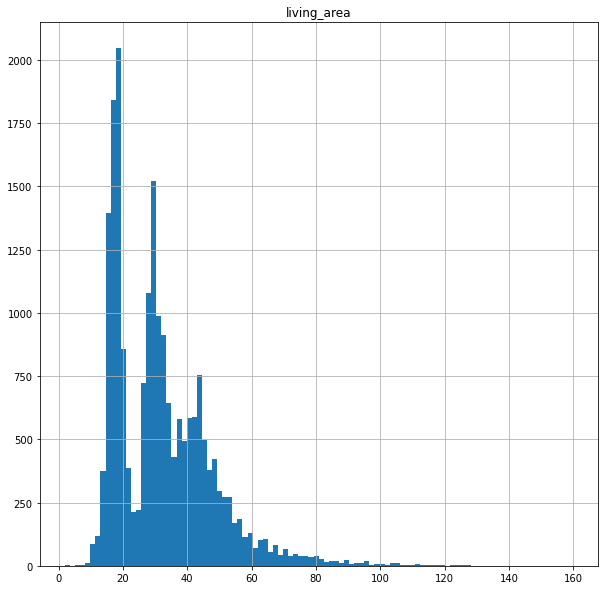

In [37]:
data['living_area'] = data['living_area'].round(1)
data.hist('living_area', bins=100, figsize=(10, 10))

Рассмотрим поближе участок от 10 до 120.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

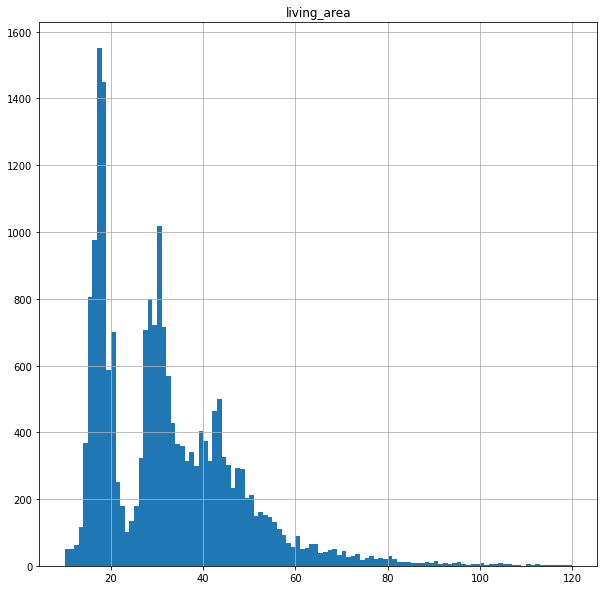

In [38]:
data.hist('living_area', bins=110, range=(10, 120), figsize=(10, 10))

Ограничимся значениями жилой площади от 10 до 100.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

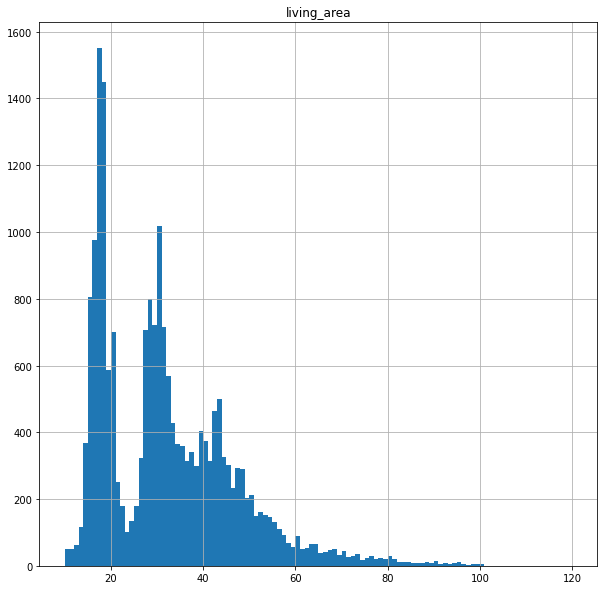

In [39]:
data = data[((10<=data['living_area'])&(data['living_area']<=100))|(data['living_area'].isna())]
data.hist('living_area', bins=110, range=(10, 120), figsize=(10, 10))

##### floor - этаж

In [40]:
print(data['floor'].value_counts())
print(sorted(data['floor'].unique()))

2     3147

3     2870

1     2780

4     2592

5     2467

6     1201

7     1140

8     1034

9     1010

10     661

12     500

11     496

13     357

15     325

14     321

16     298

17     213

18     168

19     131

21     118

20     108

22     104

23      92

24      59

25      43

26      20

27       7

Name: floor, dtype: int64

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Аномальных значений не обнаружено. Построим гистограмму.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

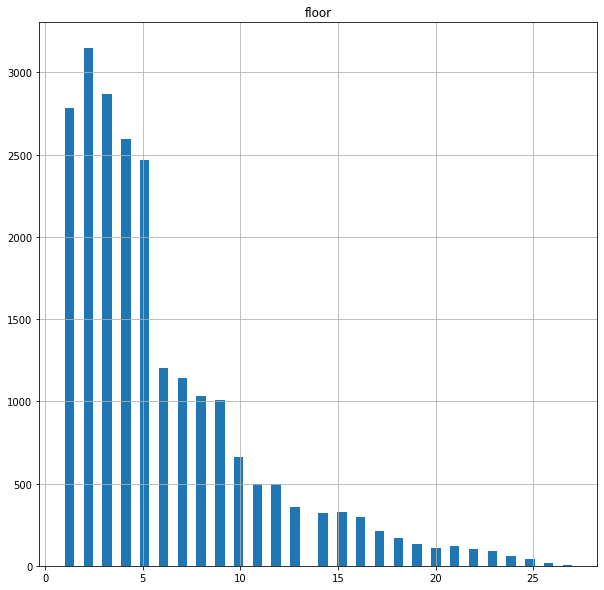

In [41]:
data.hist('floor', bins=54, figsize=(10, 10))

Видим, что на высоких этажах квартиры встречаются реже, чем на нижних этажах. Это логично, ведь чем больше этажей, тем в принципе меньше домов, в которых может находиться квартира.  
Оставим данный столбец как есть.

##### kitchen_area - площадь кухни в квадратных метрах

In [42]:
print(data['kitchen_area'].value_counts())
print(sorted(data['kitchen_area'].unique()))

6.00     1287

10.00    1220

8.00     1096

9.00     1082

7.00     1052

         ... 

8.12        1

41.30       1

15.18       1

28.64       1

16.74       1

Name: kitchen_area, Length: 870, dtype: int64

[1.3, 2.0, 3.0, 4.9, 5.2, 5.3, 5.5, 5.6, 5.7, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 7.0, 7.1, 7.2, 7.3, 7.5, 7.6, 8.0, 8.3, 8.4, 8.5, 8.8, 8.81, 9.0, 9.1, 9.2, 9.5, 10.0, 10.2, 10.4, 10.7, 10.8, 11.0, 11.1, 11.5, 11.6, 11.7, 11.9, 11.95, 12.0, 13.0, 13.4, 14.4, 15.0, 15.5, 16.0, 18.3, 18.9, 19.6, 20.0, 23.6, 25.0, 41.0, nan, 2.3, 2.89, 3.2, 3.4, 3.5, 3.7, 3.8, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 5.0, 5.04, 5.06, 5.1, 5.14, 5.21, 5.23, 5.25, 5.28, 5.29, 5.31, 5.33, 5.35, 5.4, 5.42, 5.44, 5.47, 5.49, 5.53, 5.59, 5.61, 5.62, 5.64, 5.65, 5.68, 5.74, 5.75, 5.78, 5.8, 5.82, 5.85, 5.86, 5.9, 5.91, 6.02, 6.03, 6.16, 6.19, 6.22, 6.23, 6.24, 6.25, 6.26, 6.27, 6.28, 6.31, 6.33, 6.35, 6.36, 6.37, 6.47, 6.55, 6.58, 6.6, 6.61, 6.62, 6.65, 6.7, 6.72, 6.73, 6.76, 6.77, 6.8, 6.82, 6.83, 6.84, 

Аномальных значений не обнаружено. Для удобства округлим значения до 1 знака после запятой и построим гистограмму.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

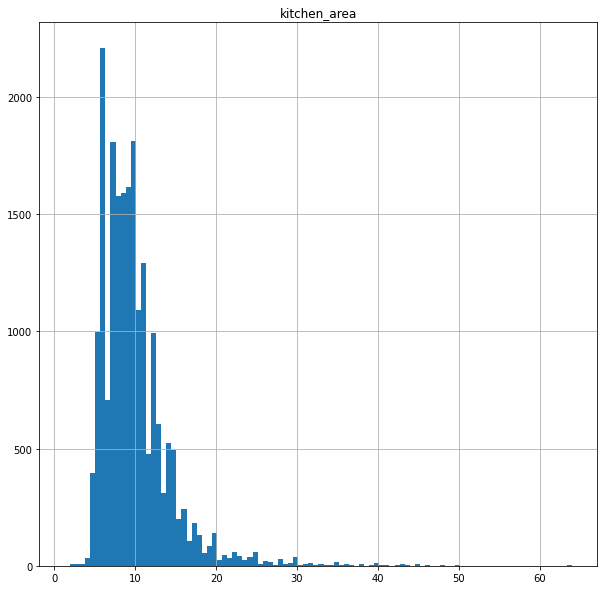

In [43]:
data['kitchen_area'] = data['kitchen_area'].round(1)
data.hist('kitchen_area', bins=100, figsize=(10, 10))

Рассмотрим поближе участок от 0 до 50.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

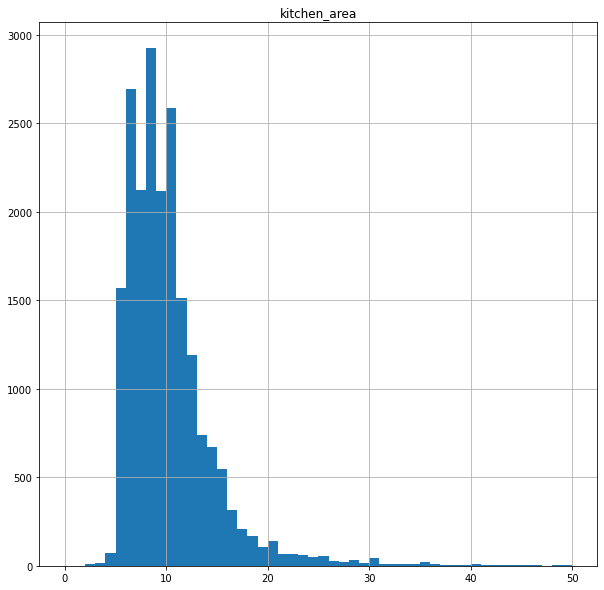

In [44]:
data.hist('kitchen_area', bins=50, range=(0, 50), figsize=(10, 10))

Ограничимся значениями площади кухни от 5 до 40.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

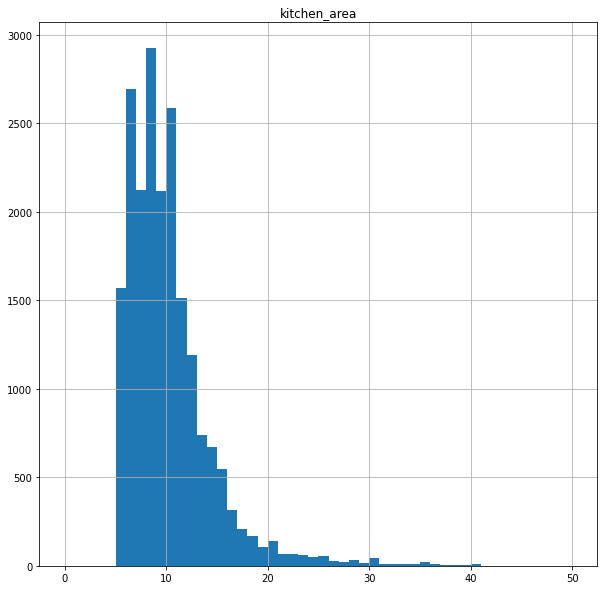

In [45]:
data = data[((5<=data['kitchen_area'])&(data['kitchen_area']<=40))|(data['kitchen_area'].isna())]
data.hist('kitchen_area', bins=50, range=(0, 50), figsize=(10, 10))

##### balcony - число балконов

In [46]:
print(data['balcony'].value_counts())

0.0    14187

1.0     3947

2.0     3470

5.0      280

4.0      162

3.0       72

Name: balcony, dtype: int64


Аномалий не обнаружено. Оставим столбец balcony как есть.

##### airports_nearest - расстояние до ближайшего аэропорта в метрах

In [47]:
print(data['airports_nearest'].value_counts())
print(sorted(data['airports_nearest'].unique()))

37434.0    49

21928.0    30

44870.0    28

39946.0    26

19499.0    23

           ..

17112.0     1

17323.0     1

10811.0     1

11506.0     1

20875.0     1

Name: airports_nearest, Length: 7829, dtype: int64

[0.0, 6450.0, 6995.0, 7019.0, 7026.0, 7106.0, 7316.0, 7399.0, 7651.0, 7659.0, 7900.0, 8340.0, 8502.0, 9171.0, 9172.0, 9258.0, 9294.0, 9354.0, 9508.0, 9528.0, 9740.0, 9855.0, 9865.0, 9869.0, 9879.0, 9984.0, 10061.0, 10066.0, 10069.0, 10143.0, 10228.0, 10275.0, 10277.0, 10318.0, 10378.0, 10409.0, 10451.0, 10470.0, 10552.0, 10586.0, 10590.0, 10596.0, 10626.0, 10638.0, 10643.0, 10663.0, 10691.0, 10700.0, 10731.0, 10742.0, 10764.0, 10796.0, 10823.0, 10841.0, 10874.0, 10934.0, 10949.0, 10958.0, 11035.0, 11036.0, 11046.0, 11053.0, 11072.0, 11125.0, 11135.0, 11171.0, 11192.0, 11196.0, 11270.0, 11286.0, 11349.0, 11360.0, 11390.0, 11405.0, 11425.0, 11445.0, 11459.0, 11485.0, 11580.0, 11633.0, 11637.0, 11645.0, 11664.0, 11690.0, 11704.0, 11732.0, 11756.0, 11764.0, 11796.0, 11819.0, 1

Видим минимальное значение 0. Скорее всего квартира не может располагаться прямо на территории аэропорта, и кто-то записал сюда количество аэропортов поблизости. Посмотрим сколько раз встречается значение 0.

In [48]:
print(data[data['airports_nearest']==0]['airports_nearest'].count())

1


Всего один раз встретился 0. Исключим эту строку и далее построим гистограмму.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

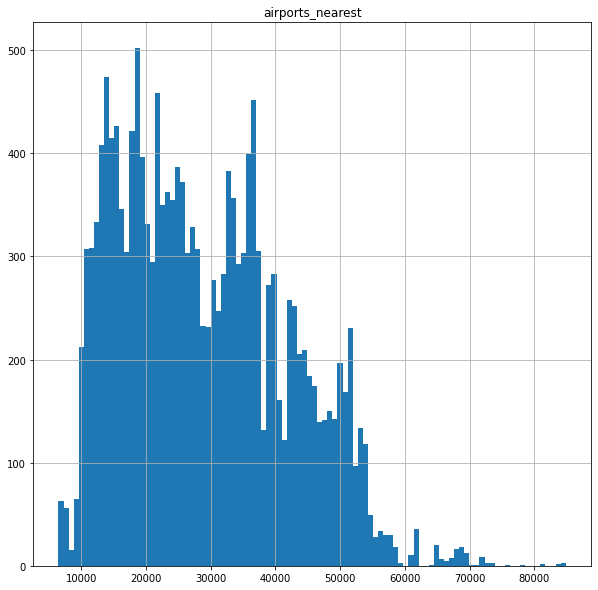

In [49]:
data = data[(data['airports_nearest']!=0)|(data['airports_nearest'].isna())]
data.hist('airports_nearest', bins=100, figsize=(10, 10))

Рассмотрим поближе диапазон от 5000 до 75000.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

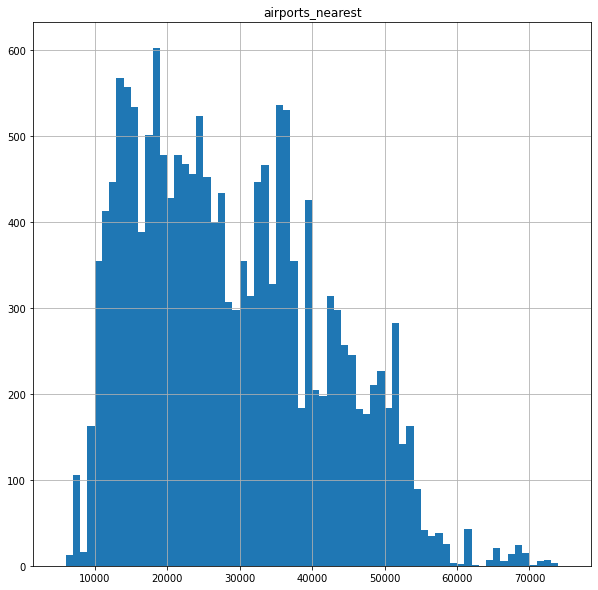

In [50]:
data.hist('airports_nearest', bins=70, range=(5000, 75000), figsize=(10, 10))

Ограничимся диапазоном от 5000 до 70000.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

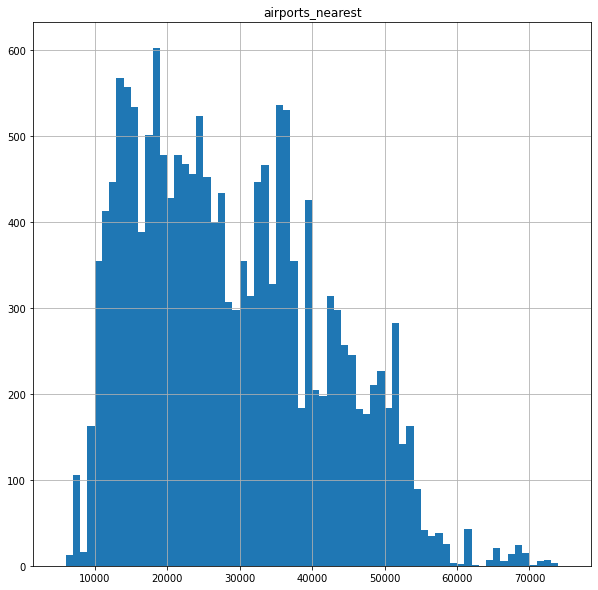

In [51]:
data = data[((5000<=data['airports_nearest'])&(data['airports_nearest']<=75000))|(data['airports_nearest'].isna())]
data.hist('airports_nearest', bins=70, range=(5000, 75000), figsize=(10, 10))

##### cityCenters_nearest - расстояние до центра города

In [52]:
print(data['cityCenters_nearest'].value_counts())
print(sorted(data['cityCenters_nearest'].unique()))

8460.0     49

20802.0    30

10720.0    26

17369.0    24

8370.0     24

           ..

13516.0     1

39893.0     1

33843.0     1

25727.0     1

4234.0      1

Name: cityCenters_nearest, Length: 7220, dtype: int64

[287.0, 399.0, 467.0, 472.0, 515.0, 650.0, 653.0, 658.0, 671.0, 686.0, 700.0, 730.0, 743.0, 801.0, 820.0, 830.0, 835.0, 853.0, 936.0, 964.0, 996.0, 1053.0, 1075.0, 1090.0, 1097.0, 1141.0, 1155.0, 1166.0, 1178.0, 1181.0, 1211.0, 1249.0, 1261.0, 1276.0, 1283.0, 1292.0, 1325.0, 1356.0, 1369.0, 1381.0, 1404.0, 1431.0, 1454.0, 1492.0, 1514.0, 1572.0, 1589.0, 1592.0, 1641.0, 1724.0, 1754.0, 1755.0, 1772.0, 1780.0, 1796.0, 1826.0, 1862.0, 1884.0, 1898.0, 1900.0, 1902.0, 1936.0, 1949.0, 1963.0, 2004.0, 2021.0, 2056.0, 2136.0, 2139.0, 2142.0, 2143.0, 2144.0, 2184.0, 2211.0, 2229.0, 2245.0, 2256.0, 2267.0, 2282.0, 2293.0, 2309.0, 2315.0, 2318.0, 2321.0, 2329.0, 2333.0, 2336.0, 2342.0, 2357.0, 2370.0, 2371.0, 2404.0, 2423.0, 2427.0, 2442.0, 2443.0, 2446.0, 2447.0, 2457.0, 2485.0, 

Аномалий не обнаружено. Построим гистограмму.

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

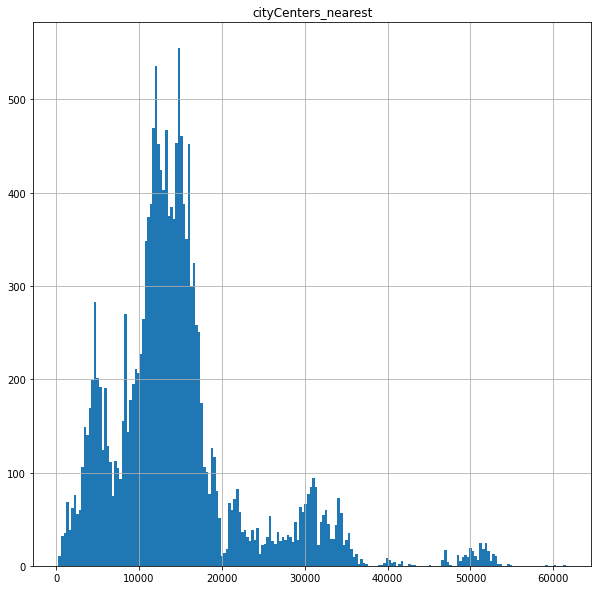

In [53]:
data.hist('cityCenters_nearest', bins=200, figsize=(10, 10))

В районе 50000 метров видим сножество значений, которые не стоит исключать. Поэтому ограничимся диапазоном от 0 до 55000.

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

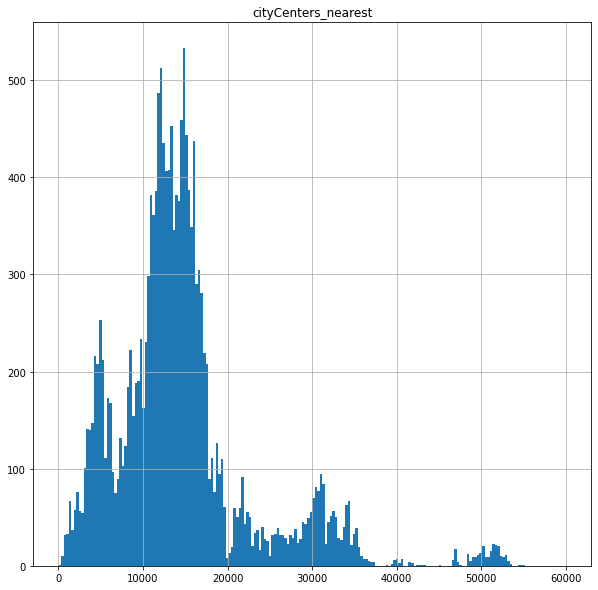

In [54]:
data = data[((0<=data['cityCenters_nearest'])&(data['cityCenters_nearest']<=55000))|(data['cityCenters_nearest'].isna())]
data.hist('cityCenters_nearest', bins=200, range=(0, 60000), figsize=(10, 10))

##### parks_around3000 - число парков в радиусе 3 км

In [55]:
print(data['parks_around3000'].value_counts())
print(sorted(data['parks_around3000'].unique()))

0.0    9571

1.0    5238

2.0    1496

3.0     487

Name: parks_around3000, dtype: int64

[0.0, 1.0, nan, 2.0, 3.0]


Аномалий не обнаружено. Оставим столбец parks_around3000 как есть.

##### parks_nearest - расстояние до ближайшего парка в метрах

In [56]:
print(data['parks_nearest'].value_counts())
print(sorted(data['parks_nearest'].unique()))

441.0     54

392.0     39

173.0     34

456.0     33

471.0     31

          ..

887.0      1

1086.0     1

1094.0     1

73.0       1

929.0      1

Name: parks_nearest, Length: 979, dtype: int64

[1.0, 9.0, 13.0, 19.0, 27.0, 36.0, 42.0, 52.0, 53.0, 57.0, 61.0, 68.0, 147.0, 152.0, 157.0, 159.0, 161.0, 170.0, 173.0, 175.0, 177.0, 181.0, 192.0, 194.0, 196.0, 201.0, 207.0, 211.0, 220.0, 226.0, 233.0, 234.0, 236.0, 238.0, 250.0, 252.0, 258.0, 259.0, 263.0, 265.0, 288.0, 289.0, 290.0, 291.0, 292.0, 326.0, 328.0, 330.0, 336.0, 337.0, 343.0, 367.0, 368.0, 388.0, 391.0, 393.0, 399.0, 403.0, 412.0, 416.0, 433.0, 435.0, 439.0, 441.0, 446.0, 456.0, 458.0, 460.0, 464.0, 470.0, 472.0, 481.0, 482.0, nan, 3.0, 4.0, 7.0, 10.0, 11.0, 12.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 30.0, 32.0, 33.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 46.0, 48.0, 49.0, 50.0, 51.0, 54.0, 55.0, 56.0, 58.0, 59.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 69.0, 72.0, 73.0

Вилим минимальное значение 1 метр. Скорее всего кваритира не может располагаться настолько близко к парку и кто-то имел ввиду 1 км. Посмотрим сколько раз 1 встречается в столбце.

In [57]:
print(data[data['parks_nearest']==1]['parks_nearest'].count())

1


Всего один раз встретилась 1. Лучше исключить строку с этим значением, а не умножить записывать туда 1000, так как это только предположение, что 1 означает 1 км. Исключим эту строку и далее построим гистограмму.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

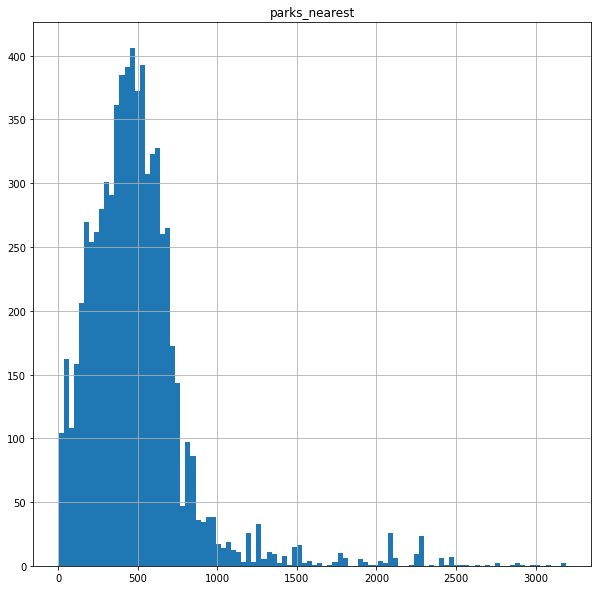

In [58]:
data = data[(data['parks_nearest']!=1)|(data['parks_nearest'].isna())]
data.hist('parks_nearest', bins=100, figsize=(10, 10))

Видим небольшие стобцы в районе 2500, а далее уже совсем редкие значения. Ограничимся диапазоном от 0 до 2500.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

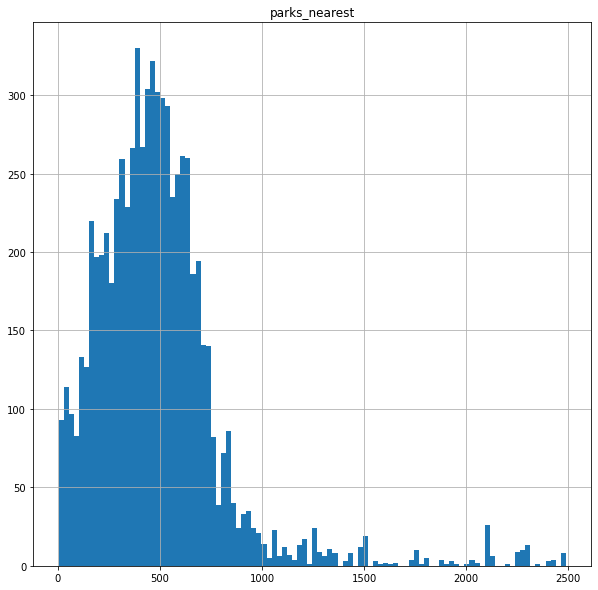

In [59]:
data = data[((0<=data['parks_nearest'])&(data['parks_nearest']<=2500))|(data['parks_nearest'].isna())]
data.hist('parks_nearest', bins=100, figsize=(10, 10))

##### ponds_around3000 - число водоёмов в радиусе 3 км

In [60]:
print(data['ponds_around3000'].value_counts())
print(sorted(data['ponds_around3000'].unique()))

0.0    8633

1.0    5283

2.0    1685

3.0    1175

Name: ponds_around3000, dtype: int64

[0.0, 2.0, nan, 1.0, 3.0]


Аномалий не обнаружено. Оставим столбец ponds_around3000 как есть.

##### ponds_nearest - расстояние до ближайшего водоёма в метрах

In [61]:
print(data['ponds_nearest'].value_counts())
print(sorted(data['ponds_nearest'].unique()))

427.0     58

433.0     39

454.0     34

564.0     34

303.0     32

          ..

845.0      1

1313.0     1

949.0      1

1207.0     1

995.0      1

Name: ponds_nearest, Length: 1080, dtype: int64

[13.0, 20.0, 22.0, 23.0, 55.0, 68.0, 77.0, 84.0, 97.0, 100.0, 115.0, 133.0, 144.0, 155.0, 178.0, 179.0, 192.0, 212.0, 221.0, 222.0, 233.0, 239.0, 240.0, 248.0, 256.0, 260.0, 264.0, 274.0, 287.0, 295.0, 297.0, 309.0, 314.0, 315.0, 332.0, 342.0, 346.0, 349.0, 350.0, 353.0, 357.0, 359.0, 363.0, 372.0, 374.0, 381.0, 390.0, 393.0, 398.0, 405.0, 411.0, 433.0, 441.0, 443.0, 464.0, 465.0, 474.0, 485.0, 516.0, 519.0, 534.0, 542.0, 556.0, 563.0, 565.0, 571.0, 582.0, 585.0, 590.0, 594.0, 611.0, 623.0, 627.0, 639.0, 659.0, 667.0, 685.0, 694.0, 699.0, 713.0, 729.0, 745.0, 755.0, nan, 16.0, 19.0, 24.0, 25.0, 26.0, 27.0, 29.0, 31.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 50.0, 51.0, 52.0, 53.0, 54.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.

Аномалий не обнаружено. Построим гистограмму.

array([[<AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

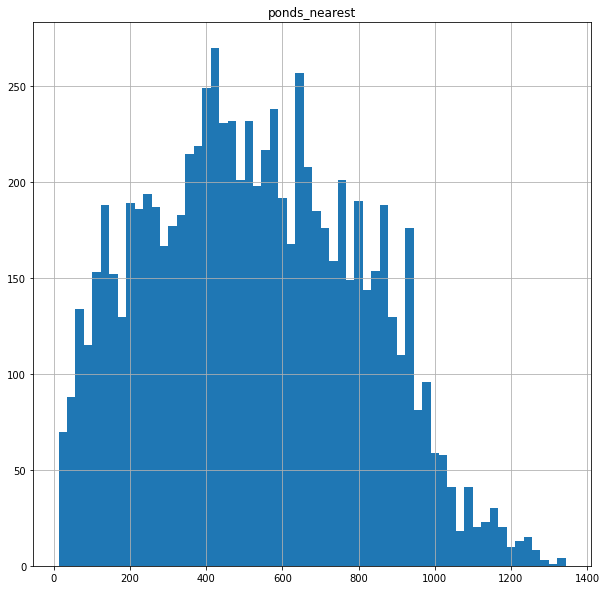

In [62]:
data.hist('ponds_nearest', bins=60, figsize=(10, 10))

В принципе, нет длинных хвостов с очень низкими столбцами, что означает малое количество редко встречающихся значений. Поэтому оставим значения столбца ponds_nearest без изменений.

##### days_exposition - сколько дней было размещено объявление (от публикации до снятия)

In [63]:
print(data['ponds_around3000'].value_counts())
print(sorted(data['ponds_around3000'].unique()))

0.0    8633

1.0    5283

2.0    1685

3.0    1175

Name: ponds_around3000, dtype: int64

[0.0, 2.0, nan, 1.0, 3.0]


Аномалий не обнаружено. Оставим столбец ponds_around3000 как есть.

Помним, что изначально в таблице было 23699 строк. Посчитаем, какая доля из них была удалена.

In [64]:
print('Доля удаленных строк:', 1-data.shape[0]/23699)

Доля удаленных строк: 0.0679353559221908


**Предобработка данных завершена. Пропуски и аномальные значения по возможности исправлены. Процент удаленных данных в ходе предобработки - 6.8%.**

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

Чтобы получить цену одного квадратного метра, нужно взять цену квартиры last_price и поделить на площадь total_area. Создадим столбец one_square_price и запишем в него соответствующие значения и округлим их до 1 знака после запятой. Оба столбца не имеют пропусков и нулевых значений, поэтому nan и 0 обрабатывать не будем.

In [65]:
data['one_square_price'] = (data['last_price']/data['total_area']).round(1)

#### День недели публикации объявления

Создадим столбец week_day_of_exposition и запишем в него день недели публикации объявления, где 0 — понедельник, 1 — вторник и так далее. Благо, пропусков в столбце first_day_exposition нет, поэтому обрабатывать nan не нужно. Выведем уникальные значения, чтобы понять, что все работает.

In [66]:
data['week_day_of_exposition'] = data['first_day_exposition'].dt.weekday
print(data['week_day_of_exposition'].unique())

[3 1 0 2 6 5 4]


#### Месяц публикации объявления

Создадим столбец month_of_exposition и запишем в него месяц публикации объявления. Выведем уникальные значения, чтобы понять, что все работает.

In [67]:
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
print(data['month_of_exposition'].unique())

[ 3 12  8  9 11  4  5  2  6  7  1 10]


#### Год публикации объявления

Создадим столбец year_of_exposition и запишем в него год публикации объявления. Выведем уникальные значения, чтобы понять, что все работает.

In [68]:
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
print(data['year_of_exposition'].unique())

[2019 2018 2015 2017 2016 2014]


#### Тип этажа квартиры

Создадим столбец floor_type и запишем в него тип этажа, на котором находится квартира. Для типов примем значения «первый», «последний» и «другой». Выведем уникальные значения столбца floor_type, чтобы понять, что все работает.

In [69]:
# создадим функцию, которая будет возвращать тип этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif (row['floor'] == row['floors_total'])&(row['floors_total']!=1):
        return 'последний'
    else:
        return 'другой'
# присвоим новому столбцу результат работы функции
data['floor_type'] = data.apply(floor_type, axis=1)
# выведем уникальные значения нового столбца
print(data['floor_type'].unique())

['другой' 'первый' 'последний']


#### Расстояние до центра города в километрах

Создадим столбец cityCenters_nearest_km, и запишем в него значения столбца cityCenters_nearest, поделенные на 1000 и округленные до целых значений. Выведем уникальные значеняи, чтобы понять, что все работает.

In [70]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(0)
print(data['cityCenters_nearest_km'].unique())

[16. 19. 14. nan 12. 15. 52. 33. 31. 11. 13. 10.  2. 32. 17. 30.  7.  4.

  5. 51.  8. 50. 24. 18.  9. 28.  3.  6. 27. 21. 49. 35. 36. 34.  1. 29.

 26. 53. 22. 55. 23. 25. 20. 47. 40. 37. 41.  0. 48. 39. 43. 54. 42. 45.]


**Задание выполнено, талбица с данными дополнена необходимыми столбцами.**

### Проведите исследовательский анализ данных

#### Изучение основных параметров

##### Общая площадь

Построим гистограмму.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

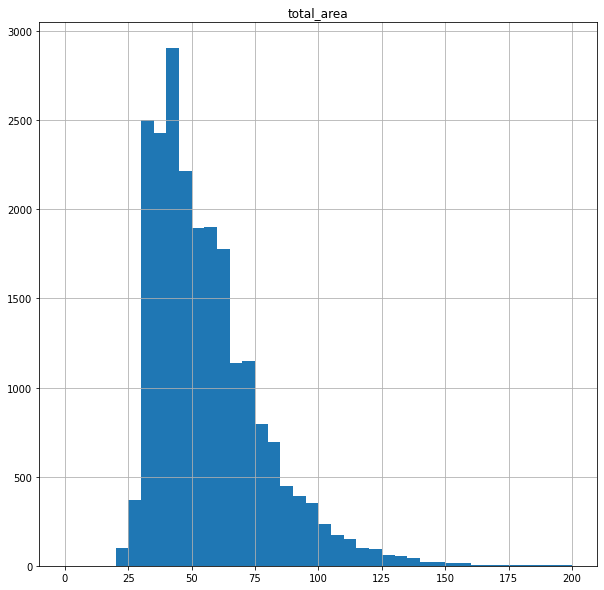

In [71]:
data.hist('total_area', bins=40, range=(0, 200), figsize=(10, 10))

Кривая похожа на распределение Пуассона.

Выведем еще количество квартир по количеству комнат, так как на гистограмме имеются ступени и возможно они коррелируются с числом комнат. Еще отдельно выведем информацию по квартирам-студиям, а именно сколько комнат у них записано в столбце rooms и сколько всего таких квартир.

In [72]:
# количество квартир по количеству комнат
print(data['rooms'].value_counts())

# сколько комнат записано для студий и сколько таких студий
print(data[data['studio']==True]['rooms'].value_counts())

1    7876

2    7663

3    5418

4     939

5     172

6      21

Name: rooms, dtype: int64

1    11

Name: rooms, dtype: int64


Видим, что количество однушек чуть больше, чем двушек. Также видим, что у студий записано число комнат 1 и всего студий 11 штук.

Можно увидеть ступеньки:
- меньше 25 - это скорее всего студии и очеь маленькие однушки, их довольно мало;
- примерно от 25 до 40 - предположительо, это однокомнатые и двухкомнатные квартиры, их самое большее количество;
- примерно от 40 до 60 - это скорее всего двухкомнатные и трехкомнатные квартиры;
- более 60 - уже не особо видны ступени, потому что когда комнат много, то квартиры часто могут быть одной и той же площади, но с разным количеством комнат.

##### Жилая площадь

Построим гистограмму.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

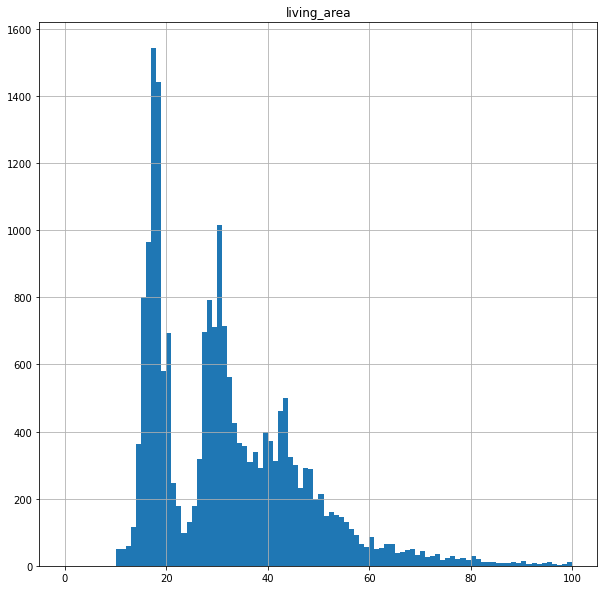

In [73]:
data.hist('living_area', bins=100, range=(0, 100), figsize=(10, 10))

Можно было бы сказать, что кривая тоже напоминает распределение Пуассона, если бы не провал в районе от 21 до 26. Предположительно, это переход между однушками и двушками, то есть при переходу с одной жилой комнаты к двум резко увеличивается жилая площадь. Поэтому чаще всего встречаются однушки с жилой площадью до 20 кв.м., а двушки чаще всего начинаются с 26-27 кв.м. жилой площади.

Похожую ситуацию видим в диапазоне от 33 до 41 кв.м., но гораздо менее выраженную. Это скорее всего переход к трехкомнатным квартирам.

##### Площадь кухни

Построим гистограмму.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

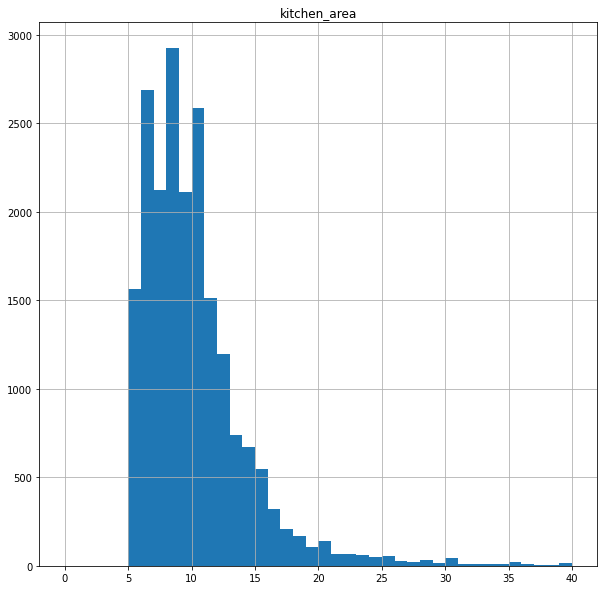

In [74]:
data.hist('kitchen_area', bins=40, range=(0, 40), figsize=(10, 10))

Практически распределение Пуассона. Видим, пики на 6, 8 и 10 кв.м. кухонной площади. Чем вызваны эти пики - непонятно.

##### Цена объекта

Построим гистограмму.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

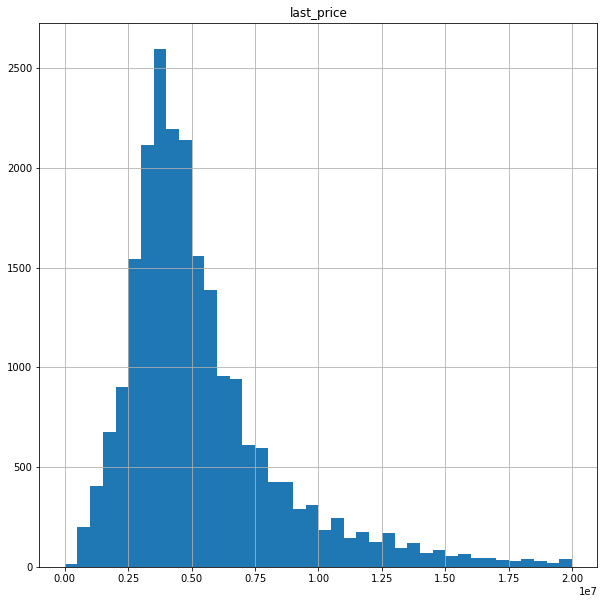

In [75]:
data.hist('last_price', bins=40, range=(0, 20*10**6), figsize=(10, 10))

Практически нормальное распределение Гаусса. Видим, что большинство квартир стоят в примерном диапазое от 2 млн до 6.5 млн.

##### Количество комнат

Построим гистограмму.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

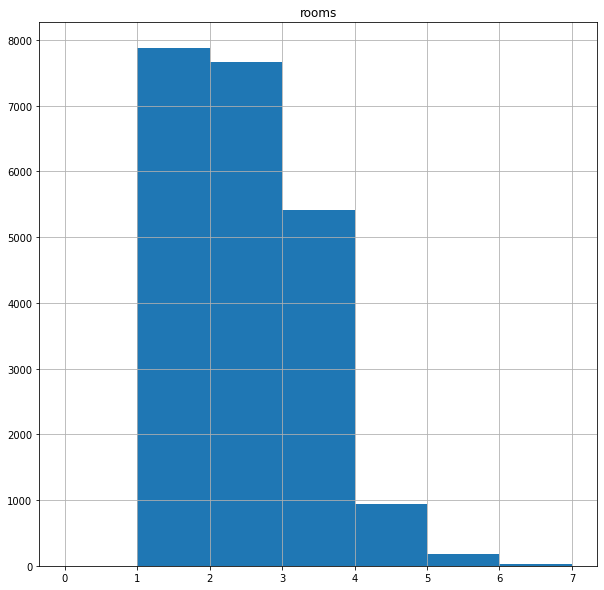

In [76]:
data.hist('rooms', bins=7, range=(0, 7), figsize=(10, 10))

По сути кривая распределения Пуассона. Видим, что однушек, включая студии, больше всего. Двушек - чуть меньше. С увеличением комнат количество квартир уменьшается.

##### Высота потолков

Построим гистограмму.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

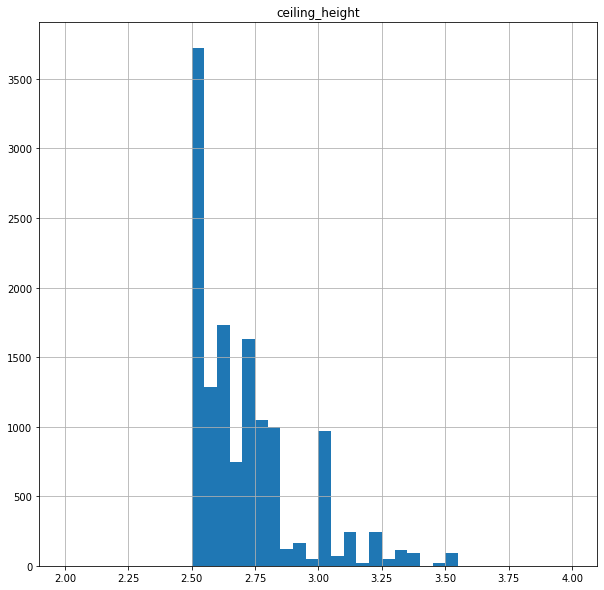

In [77]:
data.hist('ceiling_height', bins=40, range=(2, 4), figsize=(10, 10))

Видим, что в общем, чем выше потолки, тем количества квартир меньше. Но есть существенный провал в районе от 2.85 до 2.95. Логично, что чем ниже высота потолков, тем квартира дешевле в постройке, и тем больше застройщики построят таких квартир. Соответствено и продаваться потом будет таких квартир больше.

Высота 3.0 метра возможо является символической, что с этой отметки возможно начинаются квартиры уже не эконом класса. Тогда было бы логично, что застройщики, ориентированные на более состоятельных клиентов будут строить много квартир с высотой потолков именно 3.0 метра. Так сказать минимум для того, чтобы считаться комфорт классом или даже лучше.

##### Этаж квартиры

Построим гистограмму.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

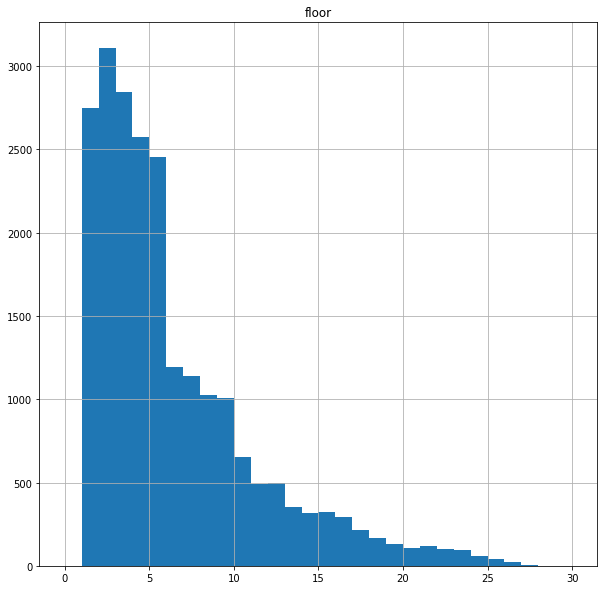

In [78]:
data.hist('floor', bins=30, range=(0, 30), figsize=(10, 10))

Напоминает кривую распределения Пуассона. Также видим, что на высоких этажах квартиры встречаются реже, чем на нижних этажах. Это логично, ведь чем выше находится квартира, тем в принципе меньше домов, в которых может находиться квартира.

Несмотря на это, видим, что квартир на первом этаже меньше, чем на втором и даже на третьем. Это обуславливается тем, что первый этаж считается небезопасным и часто становится коммерческим помещением, например для магазинов или сферы услуг.

##### Тип этажа квартиры

Построим гистограмму.

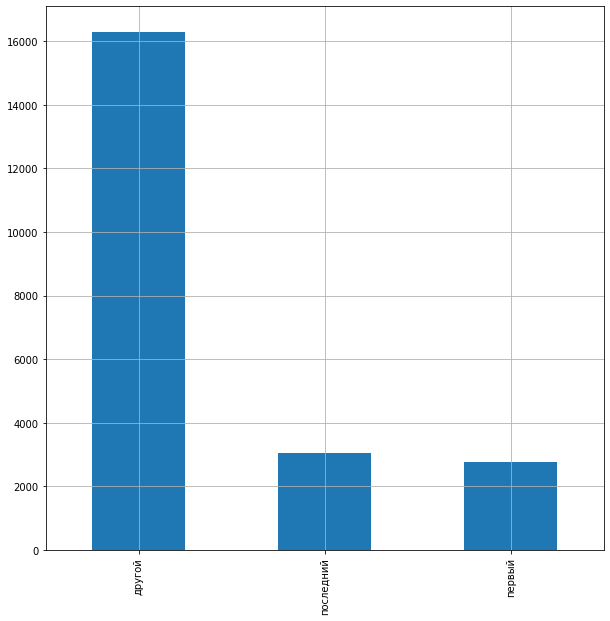

In [79]:
temp_data = data['floor_type'].value_counts().plot(kind='bar', grid=True, figsize=(10, 10))

Видим, что этажей с 'других' этажей больше всего. Это обусловлено тем, что квартиры как правило продаются в многоэтажный домах с количеством этажей больше 2. В таких домах всего один первый этаж и всего один последний этаж, а все остальные этажи - это тип этажа 'другой'.

##### Общее количество этажей в доме

Построим гистограмму

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

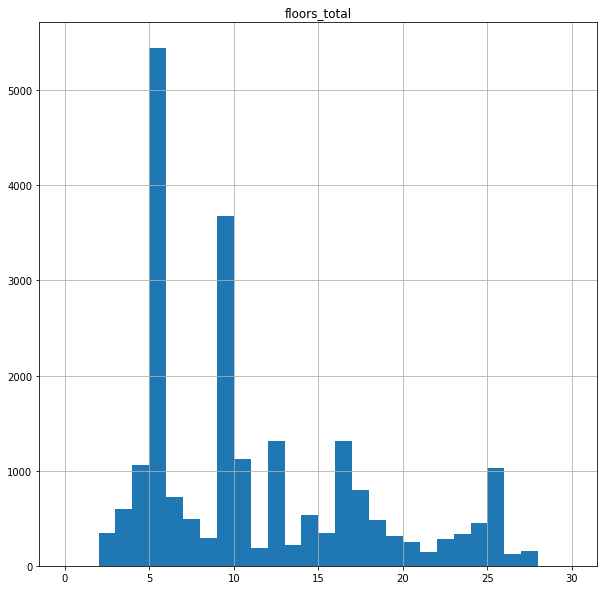

In [80]:
data.hist('floors_total', bins=30, range=(0, 30), figsize=(10, 10))

Как раз подтверждается утверждение из предыдущего пункта, что квартиры как правило продаются в многоэтажный домах с количеством этажей больше 2. Их доля относительно всех остальных домов весьма мала и это видно по первому столбцу гистограммы.

Заметно выделяющееся большое количество квартир в дома с 5 и 9 этажамаи. Это логично, так как застройка подобных домов имела масштабный характер по всей территории страны.

##### Расстояние до центра города в метрах

Построим гистограмму

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

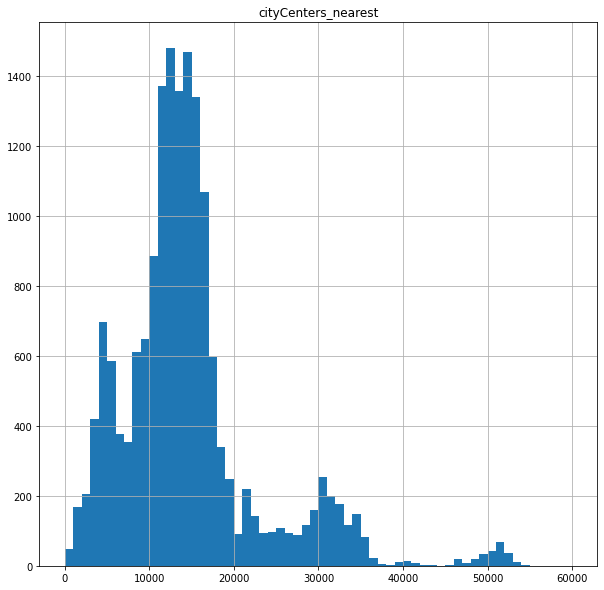

In [81]:
data.hist('cityCenters_nearest', bins=60, range=(0, 60000), figsize=(10, 10))

Видим, что вблизи центра, чем дальше от центра, тем больше квартир. Это логично, даже геометрически. Если представить центр города точкой, то то квартира, расположенная например на 5000 метрах от центра города, будет располагаться где-то окружности с радиусом 5000 метров. И чем больше радиус, тем больше длина окуржности, соответственно тем больше квартир может на этой окружности располагаться.

Однако имеется провал от 6000 до 7000 метров. Скорее всего, это обусловлено историческим развитием городов. Сачала появляетя цетр, а затем повляются промышленные предприятия, где квартирыне строят. Более 7000 метров от центра видим очень большое количество квартир, вплоть до 20000 метров. Это обусловлено тем, что в городах начинают появляться спальные районы для дюдей, которые работают в центре города и на предприятиях. Далее - чем дальше от центра, тем меньше квартир, что тоже логично, ведь большинство хочет жить ближе к центру и будет стремиться купить квартиру ближе, а не дальше. Но при том далее имеются пики значений, чему могут быть причины густонаселенные пригородные районы.

##### Расстояние до ближайшего аэропорта

Построим гистограмму

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

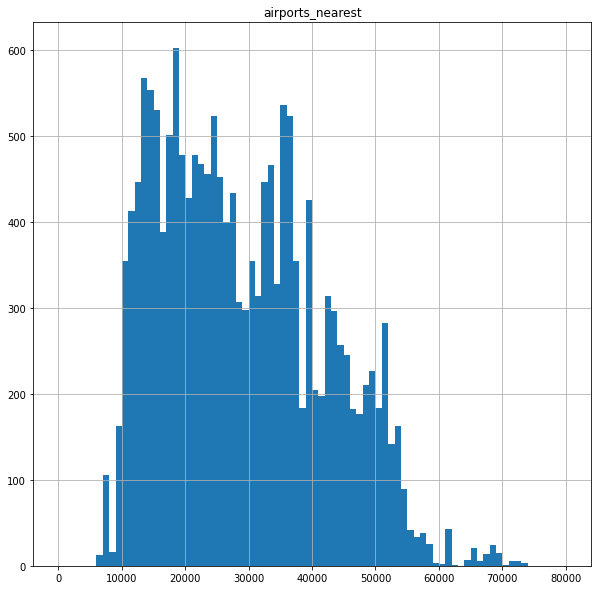

In [82]:
data.hist('airports_nearest', bins=80, range=(0, 80000), figsize=(10, 10))

Видим общую тенденцию, что чем дальше от аэропорта, тем меньше квартир. Имеются выделяющиеся столбцы, которые могут быть объяснены густонаселеными районами. Такая тенденция логична, если учитывать развитие городов. Когда население города, поселка или деревни маленькое, и количество квартир маленькое, и в аэропорт нужно ездить немногим. Когда город растет до определенных размеров, в нем увеличивается количество населения и количество квартир, возрастает необходимость в аэропорте и его строят отностиельно рядом с городом.

##### Расстояние до ближайшего парка

Построим гистограмму

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

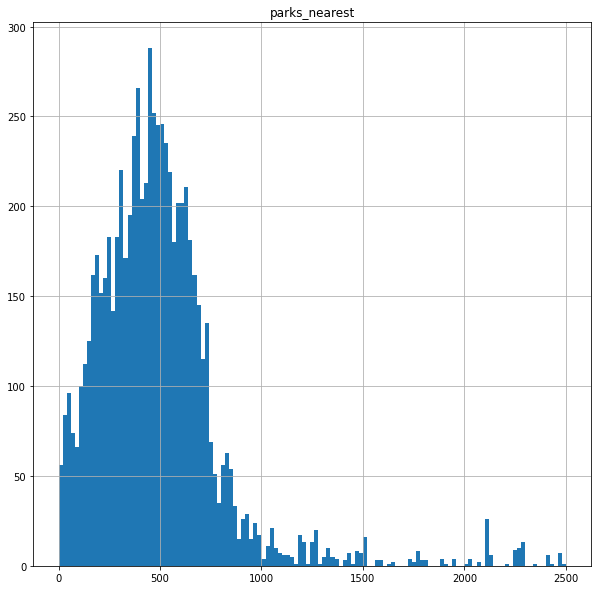

In [83]:
data.hist('parks_nearest', bins=125, range=(0, 2500), figsize=(10, 10))

Видим, что большинство квартир имеют парк в пределах 1000 метров. Скорее всего, это обусловлено нормами градостроения. Остальные квартиры скорее всего располагаются в местах, где нормы или не действуют, или парки еще не успели построить.

##### День и месяц публикации объявления

Построим гистограммы

array([[<AxesSubplot:title={'center':'month_of_exposition'}>]],
      dtype=object)

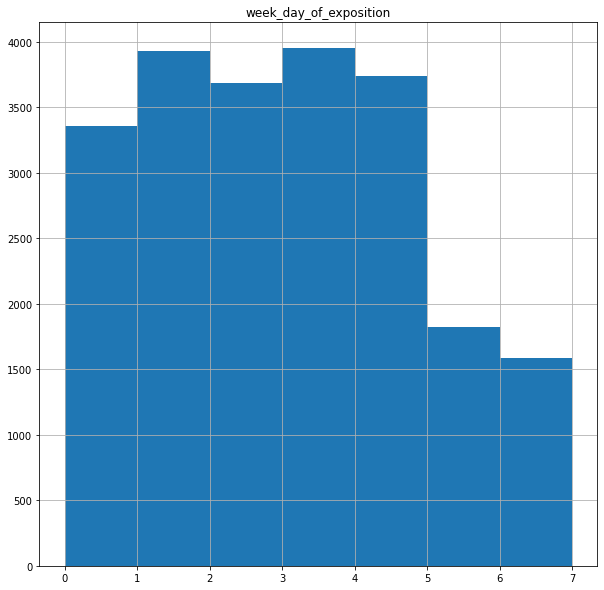

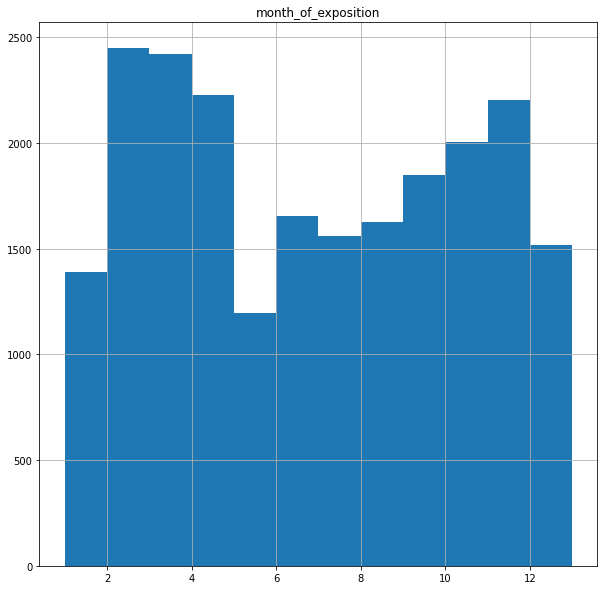

In [84]:
data.hist('week_day_of_exposition', bins=7, range=(0, 7), figsize=(10, 10))
data.hist('month_of_exposition', bins=12, range=(1, 13), figsize=(10, 10))

#range=(0, 2500), 

Напомним, 0 - понедельник, 1 - вторник, и т.д. Видим, что в течении недели объявления размещались примерно равномерно, но в субботу и воскресенье значительно меньше. В выходные дни люди хотят отдыхать и риелторам в том числе.

По месяцам видим, что основной пик активности - февраль, март и апрель. Так во многих отраслях, люди проявляют активность, когда выглядывет солнце и начинает пригревать. В мае наблюдается сильный спад количества объявлений, скорее всего это как компенсация повышенной активности в начале весны. Далее количество объявлений постепенно увеличивается, особенно, когда в августе заканчивается сезон отпусков. В декабре наблюдается спад, так как все готовятся к новому году.

**Построены все гистограммы, согласо заданию. Каждый показатель проанализирован и сделаны выводы.**

#### Изучение количества дней продажи квартир

Построим гистограмму столбца days_exposition.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

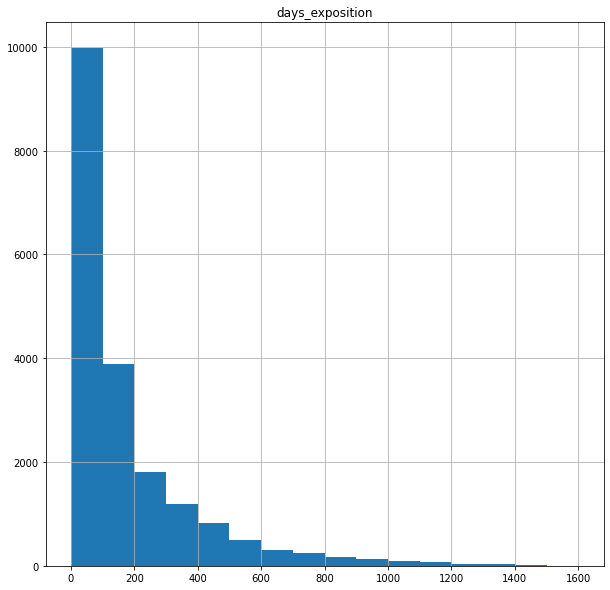

In [85]:
data.hist('days_exposition', bins=16, range=(0, 1600), figsize=(10, 10))

Посчитаем среднее значение и медиану.

In [86]:
print('Среднее значение дней продажи:', data['days_exposition'].mean())
print('Медианное значение дней продажи:', data['days_exposition'].median())

Среднее значение дней продажи: 177.39441445182723

Медианное значение дней продажи: 93.0


Этих данных будет недостаточно. Выведем описание данного параметра методом describe.

In [87]:
data['days_exposition'].describe()

count    19264.000000
mean       177.394414
std        215.835034
min          1.000000
25%         45.000000
50%         93.000000
75%        225.250000
max       1580.000000
Name: days_exposition, dtype: float64

Видим ту же среднюю mean и медиану 50%.

По гистограмме наблюдаем, что подавляющее большинство квартир продается за первые 100 дней. Однако чтобы оценить "быстрые" продажи и "необычайно долгие", понадобится построить диаграмму размаха.

<AxesSubplot:>

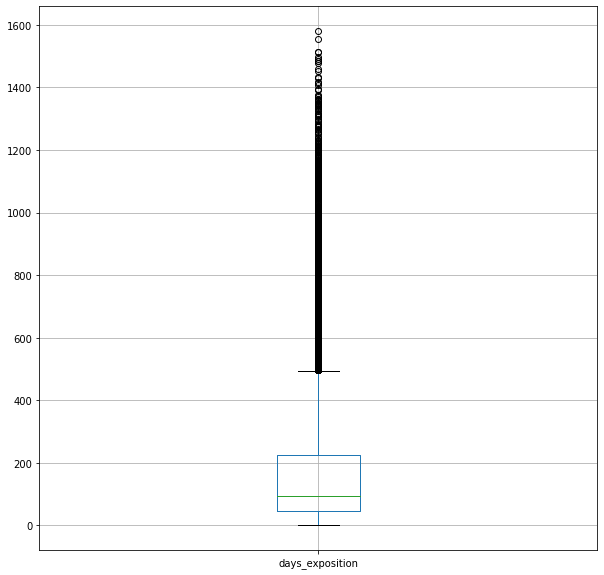

In [88]:
data.boxplot('days_exposition', figsize=(10, 10))

Видим огромное множество значений за пределами "усов", которые не были отброшены, чтобы не потерять слишком много строк данных.

**Будем считать, что:**
- **"быстрые" продажи - это все, где значение дней находятся в пределах левого (нижнего) "уса", то есть от минимального значения до первого квартиля, то есть от 1 до 44 дней;**
- **"нормальные" продажи - это те, которые находятся в пределах "ящика", то есть от первого до третьего квартиля, то есть от 45 до 225 дней;**
- **"необычайно долгие" продажи - это те, которые находятся за пределами третьего квартиля, то есть правый (верхний) "ус" и за его пределами, то есть от 226 дней.**

#### Изучение факторов, которые больше всего влияют на общую (полную) стоимость объекта

##### Зависимость от общей площади

Создадим сводную таблицу по общей площади и медианной цене. Затем по этой сводной таблице построим график.

<AxesSubplot:xlabel='total_area'>

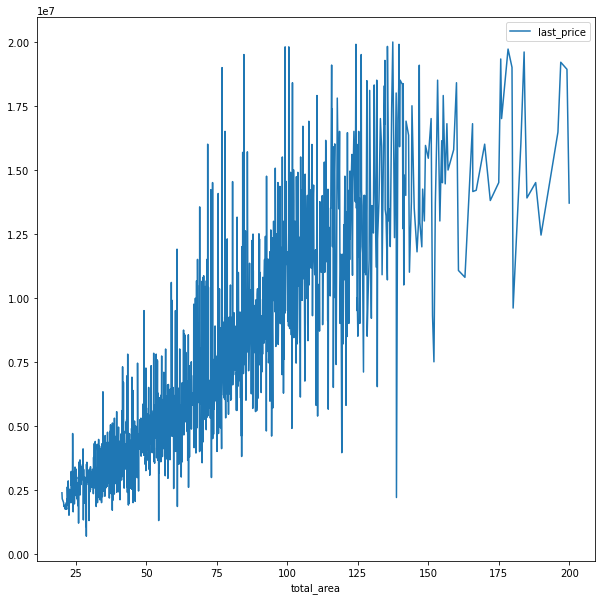

In [89]:
price_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median')
price_total_area.plot(y='last_price', figsize=(10, 10))

График выглядит страшненьким, сказывается слишком щадящая предобработка, но общий тренд виден, чем больше общая площадь, тем выше цена.


Создадим диаграмму рассеяния по цене и общей площади.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

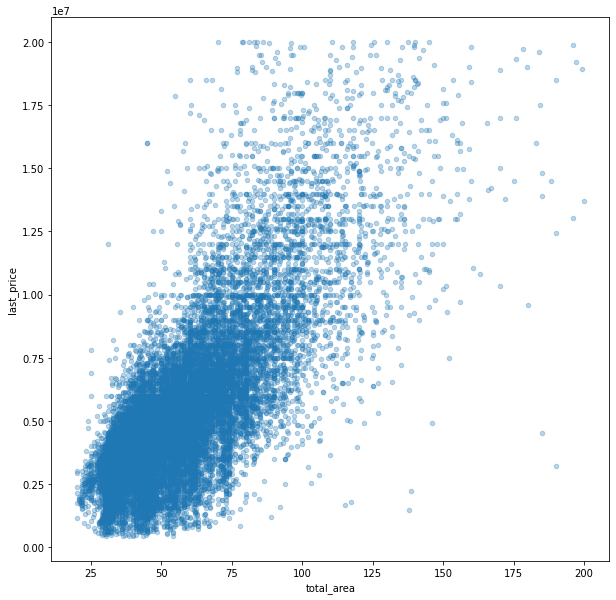

In [90]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10, 10))

Наблюдаем положительную корреляцию.

**В общем, чем больше общая площадь, тем больше цена.** 

##### Зависимость от жилой площади

Создадим сводную таблицу по жилой площади и медианной цене. Затем по этой сводной таблице построим график.

<AxesSubplot:xlabel='living_area'>

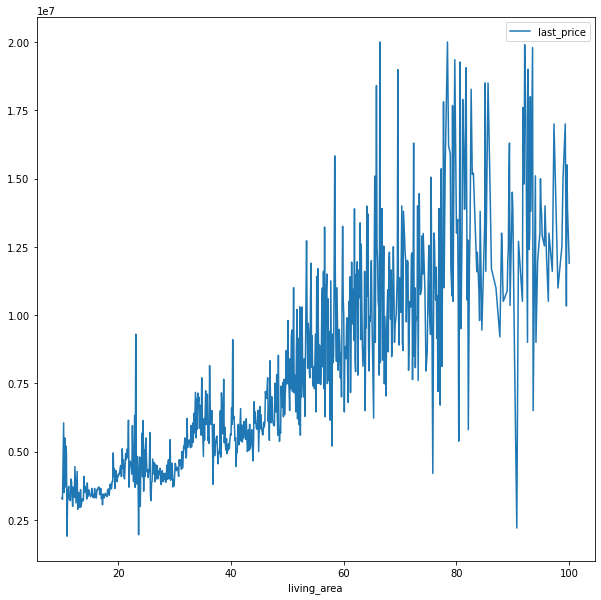

In [91]:
price_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median')
price_living_area.plot(y='last_price', figsize=(10, 10))

Аналогичная ситуация, график страшный, но общий тренд виден, чем больше жилая площадь, тем выше цена.


Создадим диаграмму рассеяния по цене и жилой площади.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

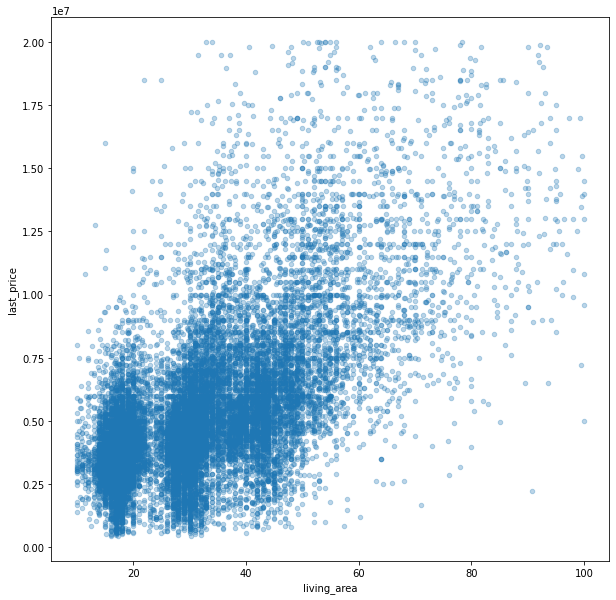

In [92]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10, 10))

А вот на диаграмме рассеяния тоже наблюдаем положительную корреляцию, но она не так сильно выражена, как на графике выше. Зато отчетливо видны пятна, предположительно соответствующие однушкам, двушкам, а для квартир с большим количеством комнат распределение более равномерное. 

**В общем, чем больше жилая площадь, тем больше цена.**

##### Зависимость от площади кухни

Создадим сводную таблицу площади кухни и медианной цене. Затем по этой сводной таблице построим график.

<AxesSubplot:xlabel='kitchen_area'>

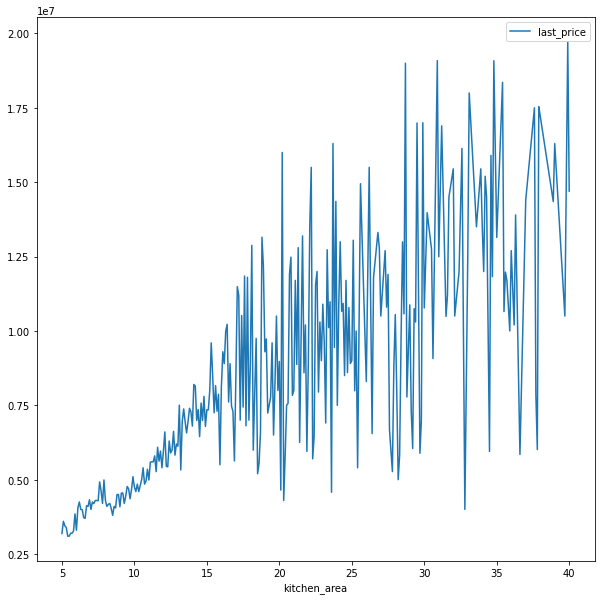

In [93]:
price_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
price_kitchen_area.plot(y='last_price', figsize=(10, 10))

Также, график страшный, и также виден общий тренд, особенно на малых площадях, чем больше площадь кухни, тем выше цена.


Создадим диаграмму рассеяния по цене и площади кухни.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

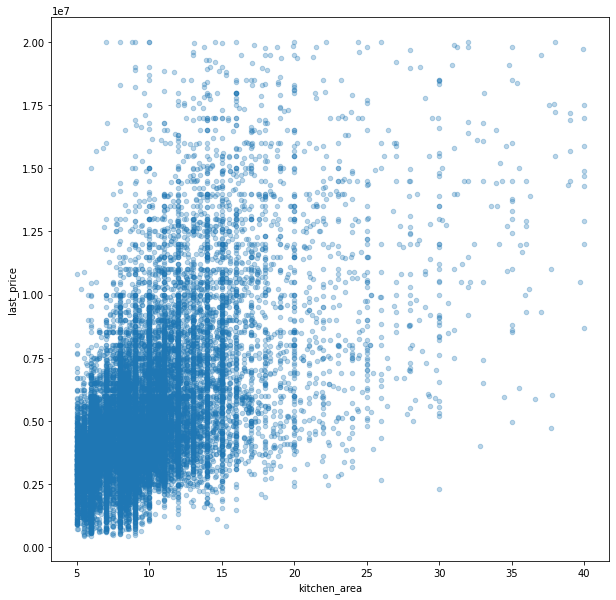

In [94]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10, 10))

Аналогичную положительную корреляцию наблюдаем диаграмме рассеяния, но она не так сильно выражена, как на графике выше. 

**В общем, чем больше площадь кухни, тем больше цена.**

##### Зависимость от количества комнат

Создадим сводную таблицу количества комнат и медианной цене. Затем по этой сводной таблице построим график.

<AxesSubplot:xlabel='rooms'>

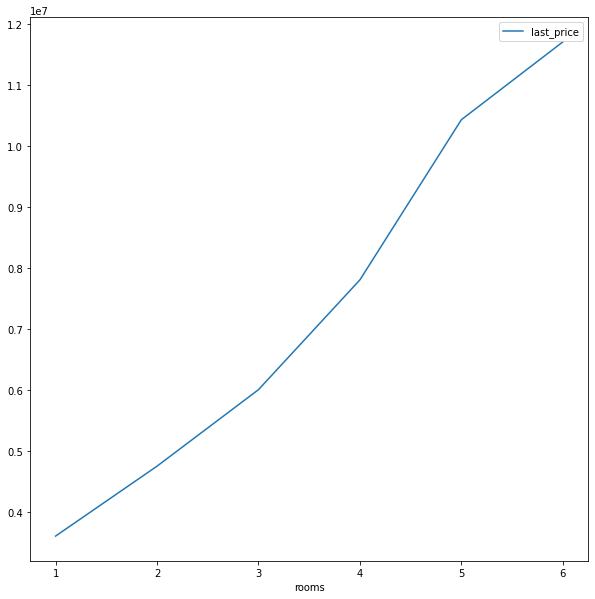

In [95]:
price_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')
price_rooms.plot(y='last_price', figsize=(10, 10))

Тут даже без диаграммы рассяния можно обойтись. Явно видна положительная корреляция. 

**В общем, чем больше количество комнат, тем больше цена.**

##### Зависимость от типа этажа, на котором расположена квартира (первый, последний, другой)

Создадим сводную таблицу по типу этажа и медианной цене. Затем по этой сводной таблице построим график.

<AxesSubplot:xlabel='floor_type'>

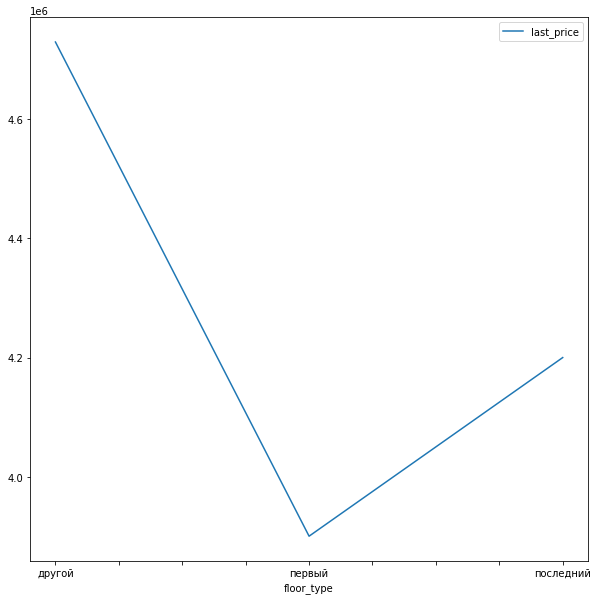

In [96]:
price_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
price_floor_type.plot(y='last_price', figsize=(10, 10))

Не очень детально, но суть понятна.  
**На первом этаже квартиры стоят дешевле, а на других этажах - самы дорогие.**  
Возможно, квартиры на последних этажах не самые дорогие, так как они высоко, есть опасения, что лифт сломается, что протечет крыша или что будет тяжело эвакуироваться в случае пожара.

##### Зависимость от даты размещения (день недели, месяц, год)

Создадим сводную таблицу по дате размещения и медианной цене. Затем по этой сводной таблице построим график.

                        last_price

week_day_of_exposition            

0                        4550000.0

1                        4650000.0

2                        4600000.0

3                        4500000.0

4                        4500000.0

5                        4500000.0

6                        4500000.0


<AxesSubplot:xlabel='week_day_of_exposition'>

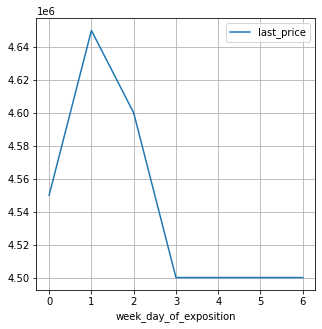

In [97]:
price_day_exposition = data.pivot_table(index='week_day_of_exposition', values='last_price', aggfunc='median')
print(price_day_exposition)
price_day_exposition.plot(y='last_price', grid=True, figsize=(5, 5))

Видим, что в понедельник, вторник и среду цены чуть выше. Но это различие около 3%, что можно считать погрешность. То есть корреляция не наблюдается.

                     last_price

month_of_exposition            

1                     4500000.0

2                     4550000.0

3                     4581000.0

4                     4700000.0

5                     4500000.0

6                     4300000.0

7                     4525000.0

8                     4500000.0

9                     4600000.0

10                    4500000.0

11                    4600000.0

12                    4600000.0


<AxesSubplot:xlabel='month_of_exposition'>

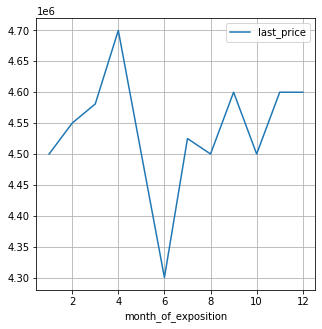

In [98]:
price_day_exposition = data.pivot_table(index='month_of_exposition', values='last_price', aggfunc='median')
print(price_day_exposition)
price_day_exposition.plot(y='last_price', grid=True, figsize=(5, 5))

Наблюдаем рост цен до апреля, затем снижение и восстановление к концу сезона отпусков, что очень напоминает гистограмму из пункта 4.1.13, распределения объявлений по месяцам. Причем изменение медианной цены в районе 10%, что нельзя списать на погрешность. Корреляция имеется, но она смешанная. 

                    last_price

year_of_exposition            

2014                 6445000.0

2015                 5067000.0

2016                 4400000.0

2017                 4400000.0

2018                 4500000.0

2019                 4960000.0


<AxesSubplot:xlabel='year_of_exposition'>

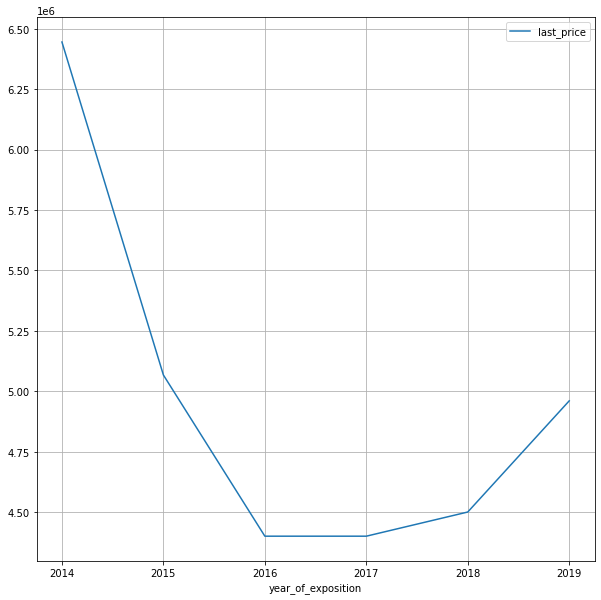

In [99]:
price_day_exposition = data.pivot_table(index='year_of_exposition', values='last_price', aggfunc='median')
print(price_day_exposition)
price_day_exposition.plot(y='last_price', grid=True, figsize=(10, 10))

Наблюдаем, что с 2014 по 2016 год цены снижались, затем стабилизировались, а с 2018 начали расти.

**Как итог, корреляция цены от дня недели размещения отсутствует, а от месяца и года - корреляция смешанная.**

**Общий вывод:
    - лучше всего с ценой квартиры положительно коррелирует количество комнат;
    - площади и тип этажа с ценой квартиры имеют также положительную корреляцию, но в меньшей степени, чем количество комнат;
    - даты размещения с ценой квартиры имеют смешанную коррелцию, кроме дня недели.**

#### Среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 22089 entries, 0 to 23698

Data columns (total 28 columns):

 #   Column                  Non-Null Count  Dtype         

---  ------                  --------------  -----         

 0   total_images            22089 non-null  int64         

 1   last_price              22089 non-null  float64       

 2   total_area              22089 non-null  float64       

 3   first_day_exposition    22089 non-null  datetime64[ns]

 4   rooms                   22089 non-null  int64         

 5   ceiling_height          13397 non-null  float64       

 6   floors_total            22009 non-null  float64       

 7   living_area             20334 non-null  float64       

 8   floor                   22089 non-null  int64         

 9   is_apartment            2589 non-null   boolean       

 10  studio                  22089 non-null  bool          

 11  open_plan               22089 non-null  bool          

 12  kitchen_area            20138

Запишем в отдельную переменную таблицу, где будут 10 населенных пунктов с самым большим количеством объявлений.
Создадим сводную таблицу по населенным пунктам и средней цене одного квадратного метра, отсортируем и выведем таблицу.

In [101]:
# Создадим переменную, куда запишем количество объявлений по населенным пунктам, затем отсортируем его по убыванию
locality_list = data.groupby('locality_name')['last_price'].count().sort_values(ascending=False)

# Оставим только первые 10 строк
locality_list = locality_list[0:10]

# Создадим таблицу, куда запишем объявления из ранее определенных населенных пунктов
locality_data = data[data['locality_name'].isin(locality_list.index)]

# Создадим сводную таблицу и выведем ее.
locality_pivot_data = locality_data.pivot_table(index='locality_name', values='one_square_price').sort_values(by='one_square_price', ascending=False)
print(locality_pivot_data)

                   one_square_price

locality_name                      

Санкт-Петербург       108338.319046

Пушкин                102024.353314

деревня Кудрово        92297.217668

поселок Парголово      90433.047302

поселок Мурино         84930.140769

поселок Шушары         78240.611111

Колпино                75352.478274

Гатчина                68954.228333

Всеволожск             67105.920361

Выборг                 58076.692544


**Вывод: среди 10 населенных пунктов с наибольшим количеством объявлений самая большая средняя цена одного квадратного метра - в Санкт-Петербурге, а самая низкая - в Выборге.**

#### Cтоимость объектов Санкт-Петербурга в зависимости от расстояния до центра города

Запишем в отдельную переменную таблицу, где будут объявления только из Санкт-Петергбурга. Далее в этой таблице введем новый столбец, куда посчитаем цену одного километра расстояния до центра. После чего создадим сводную таблицу по цене одного километра и по расстоянию до центра. Построим таблицу зависимости средней цены одного километра от расстояния до центра города.

/tmp/ipykernel_225/2681932992.py:5: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sp_data['distance_price_per_km'] = sp_data['last_price'] / sp_data['cityCenters_nearest_km']


<AxesSubplot:xlabel='cityCenters_nearest_km'>

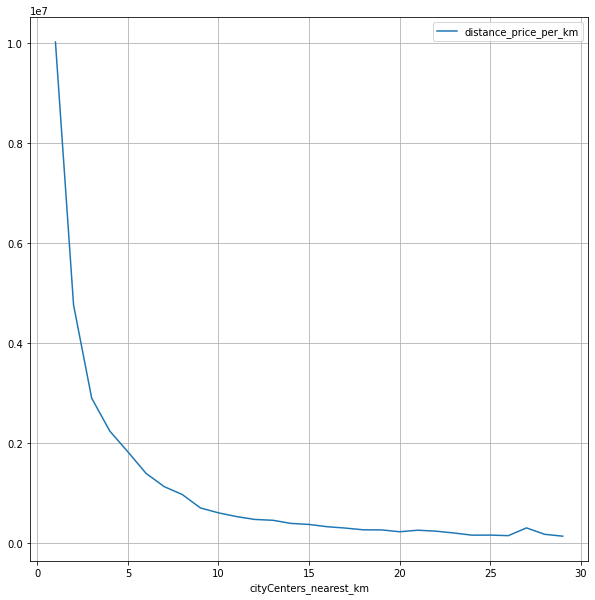

In [102]:
# Новая таблица с объявлениями из Санкт-Петербурга
sp_data = data[(data['locality_name']=='Санкт-Петербург')&(data['cityCenters_nearest_km']>0)]

# Новый столбец с ценой 1 километра до центра города
sp_data['distance_price_per_km'] = sp_data['last_price'] / sp_data['cityCenters_nearest_km']

# Сводная таблица
sp_pivot_data = sp_data.pivot_table(index='cityCenters_nearest_km', values='distance_price_per_km')

# График
sp_pivot_data.plot(y='distance_price_per_km', grid=True, figsize=(10, 10))

Наблюдаем следующуй картину. Чем ближе квартира располагается к центру, тем больше стоит километр расстояния до центра. Это наталкивает на вывод, что чем дальше от центра, тем квартира дешевле.  
Построим график цены квартиры отрасстояния до центра.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

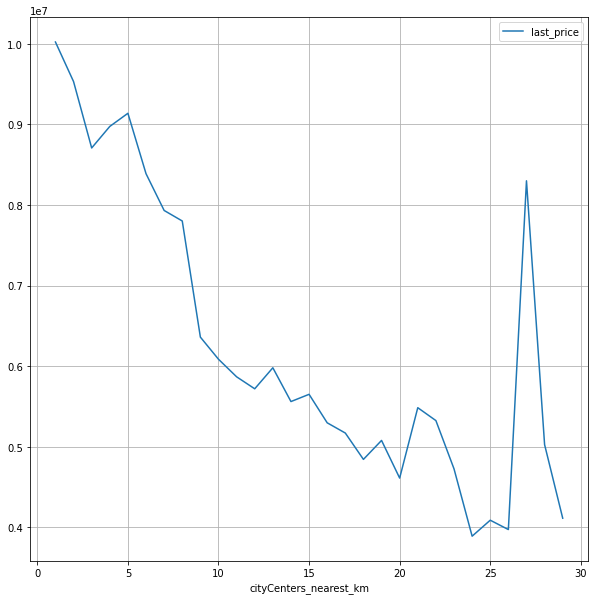

In [103]:
sp_pivot_data_2 = sp_data.pivot_table(index='cityCenters_nearest_km', values='last_price')
sp_pivot_data_2.plot(y='last_price', grid=True, figsize=(10, 10))

Собственно, это и наблюдаем.

**Вывод: чем дальше от центра расположена квартира, тем она дешевле, и тем дешевле каждый километр расстояния до центра.**

Однако на расстоянии от 25 до 30 км имеется резкий скачек. Возможно, там располагается какой-то элитный район.

### Общий вывод

Предобработка данных показала большое количество пропусков во многих столбцах. Также наблюдаются аномальные значения и выбросы, например имеется незначительная доля объявлений, где разметили более 20 фотографий. Возможно, в объявление можно было добавлять максимум 20 фотографий, а те, что больше - ошибки в данных. Возможно счетчик количества фотографий продолжал считать, когда производили замену фотографий в объявлении.

**Основные выводы проделанной работы:**  

* На гистограмме общей площади можно увидеть ступеньки:
    - меньше 25 - это скорее всего студии и очеь маленькие однушки, их довольно мало;
    - примерно от 25 до 40 - предположительо, это однокомнатые и двухкомнатные квартиры, их самое большее количество;
    - примерно от 40 до 60 - это скорее всего двухкомнатные и трехкомнатные квартиры;
    - более 60 - уже не особо видны ступени, потому что когда комнат много, то квартиры часто могут быть одной и той же площади, но с разным количеством комнат.

* На гистограмме жилой площади видим провалы от 21 до 26 кв.м.  
Предположительно, это переход между однушками и двушками, то есть при переходу с одной жилой комнаты к двум резко увеличивается жилая площадь.

* На гистограмме цены видим, что большинство квартир стоят в примерном диапазое от 2 млн до 6.5 млн.

* На гистограмме количества комнат видим, что однушек, включая студии, больше всего. Двушек - чуть меньше. С увеличением комнат количество квартир уменьшается.

* На гистограмме высоты потолков видим, что чем выше потолки, тем количество квартир меньше, однако имеется пиковое значение квартир с высотой потолков 3 метра.

* На гистограмме этажа квартир видим, что на высоких этажах квартиры встречаются реже, чем на нижних этажах. Несмотря на это, видим, что квартир на первом этаже меньше, чем на втором и даже на третьем.

* На гистограмме типа этажа видим, что больше всего квартир на эаже типа 'другой', то есть не 'первый' и не 'последний'.

* На гистограмме количества этажей в доме заметно выделяющееся большое количество квартир в дома с 5 и 9 этажамаи. Знаменитые пятиэтажки-хрущевки 50-х и девятиэтажки 60-х.

* На гистограмме расстояния до центра города видим, что сначала чем дальше от центра, тем больше квартир, но затем при увеличении расстояния количество квартир уменьшается.

* На гистограмме расстояния до ближайшего аэропорта видим общую тенденцию, что чем дальше от аэропорта, тем меньше квартир.

* На гистограмме расстояния до ближайшего парка вилим, что большинство квартир имеют парк в пределах 1000 метров.

* На гистограммах дня недели и месяца размещения объявлений видим, что в течении недели объявления размещались примерно равномерно, но в субботу и воскресенье значительно меньше. По месяцам видим, что основной пик активности - февраль, март и апрель, мае наблюдается сильный спад количества объявлений, далее количество объявлений постепенно увеличивается, особенно, когда в августе заканчивается сезон отпусков, а декабре наблюдается спад.

* По скорости продажи квартиры можно разделить на категории:
    - "быстрые" продажи - от 1 до 44 дней;
    - "нормальные" продажи - от 45 до 225 дней;
    - "необычайно долгие" продажи - от 226 дней и дольше.

* Изучение взаимосвязи цены квартры с другими параметрами показывает:
    - лучше всего с ценой квартиры положительно коррелирует количество комнат;
    - площади и тип этажа с ценой квартиры имеют также положительную корреляцию, но в меньшей степени, чем количество комнат;
    - даты размещения с ценой квартиры имеют смешанную коррелцию, кроме дня недели.

* Среди 10 населенных пунктов с наибольшим количеством объявлений самая большая средняя цена одного квадратного метра - в Санкт-Петербурге, а самая низкая - в Выборге.

* Чем дальше от центра расположена квартира, тем она дешевле, и тем дешевле каждый километр расстояния до центра.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод